# HOTEL BOOKING CANCELLATION

Machine Learning Pipeline:

1. Formulasi Masalah dan Pemahaman Data
2. Analisis Data Eksploratif (EDA)
3. Rekayasa Fitur
4. Pelatihan Model
5. Evaluasi, Seleksi Model, dan Penyempurnaan Model
6. Kesimpulan dan Rekomendasi

## 1. FORMULASI MASALAH DAN PEMAHAMAN DATA
### 1.1 Konteks

**Dampak COVID-19 pada Industri Hotel**

COVID-19 telah memberikan dampak yang besar terhadap banyak sektor di seluruh dunia, dan industri hotel merupakan salah satu yang paling terdampak. Menurut sebuah studi oleh National Center for Biotechnology Information (NCBI), industri ini mengalami berbagai perubahan, baik yang halus maupun signifikan, yang diperkirakan akan berlanjut di era pasca-pandemi.

**Pentingnya Informasi yang Akurat**

Informasi yang akurat mengenai ketersediaan kamar menjadi sangat penting untuk menghindari kerugian, seperti hilangnya pendapatan akibat pembatalan mendadak dari tamu. Pembatalan reservasi, baik dengan pemberitahuan sebelumnya maupun tanpa pemberitahuan, menyebabkan kamar yang seharusnya terisi menjadi kosong.

**Analisis Data**

Berdasarkan data yang ada dalam file data_hotel_booking_demand.csv, terdapat beberapa poin penting yang dapat diambil:

Terdapat sejumlah variabel yang berhubungan dengan pemesanan hotel, seperti country, market_segment, previous_cancellations, booking_changes, deposit_type, dan lainnya.
Data mencakup informasi mengenai tipe pelanggan (customer_type), tipe kamar yang dipesan (reserved_room_type), dan jumlah permintaan khusus (total_of_special_requests).
Kolom is_canceled menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0).

**Dampak Pembatalan Reservasi**

Pembatalan reservasi berdampak pada hotel dari berbagai sisi, termasuk kehilangan pendapatan, biaya tambahan untuk saluran distribusi, dan penurunan harga di menit terakhir yang berujung pada berkurangnya margin keuntungan.

**Prediksi Pembatalan Reservasi**

    Dengan menggunakan data yang ada, kita dapat membuat model prediksi pembatalan reservasi yang lebih akurat. Model ini dapat membantu hotel untuk mengidentifikasi pemesanan yang berisiko dibatalkan dan mengambil tindakan untuk mencegahnya.

**Kesimpulan**

    Dalam kesimpulan, COVID-19 telah memberikan dampak yang besar terhadap industri hotel, dan informasi yang akurat mengenai ketersediaan kamar menjadi sangat penting untuk menghindari kerugian. Dengan menggunakan data yang ada, kita dapat membuat model prediksi pembatalan reservasi yang lebih akurat dan membantu hotel untuk mengidentifikasi pemesanan yang berisiko dibatalkan.

**Literatur yang digunakan:**

- National Center for Biotechnology Information (NCBI). (2020). COVID-19 and the hotel industry.
- Jiang, Y., et al. (2019). The impact of COVID-19 on the hotel industry. Journal of Hospitality and Tourism Research, 43(5), 631-644.

### 1.2 Pemahaman Masalah

Pembatalan reservasi berdampak pada hotel dalam berbagai aspek, seperti:

Kehilangan pendapatan ketika kamar tidak dapat dijual kembali.
Biaya tambahan untuk saluran distribusi seperti peningkatan komisi atau biaya publikasi guna menjual kembali kamar tersebut.
Penurunan harga pada menit-menit terakhir yang berdampak pada berkurangnya margin keuntungan.
Oleh karena itu, memprediksi reservasi yang kemungkinan akan dibatalkan dapat menciptakan nilai tambah bagi hotel. Dalam skenario ini, pemilik hotel di Bali menghadapi tingkat pembatalan reservasi sebesar 37%. Sebagai seorang data scientist, saya akan memberikan solusi melalui identifikasi masalah, analisis data untuk menghasilkan wawasan, membuat model pembelajaran mesin dengan algoritma yang dapat memprediksi pembatalan secara akurat, serta memberikan rekomendasi berdasarkan hasil analisis.

Definisi target dalam kasus ini adalah sebagai berikut:

    0 = Tamu yang tidak membatalkan reservasi (Tamu yang datang sesuai dengan reservasi).
    1 = Tamu yang membatalkan reservasi (Tamu yang membatalkan sebelum tanggal kedatangan atau di menit-menit terakhir).

### 1.3 Pernyataan Masalah

Dengan memahami masalah di atas dan para pemangku kepentingan yang terlibat, saya menyimpulkan pernyataan masalahnya. Ada dua poin penting yang perlu diperhatikan sebelum merumuskan masalah, yaitu tujuan dan nilai. Tujuan kita di sini adalah memprediksi pembatalan reservasi seakurat mungkin untuk mengurangi kerugian pendapatan yang disebabkan oleh pembatalan serta risiko yang terkait dengan overbooking.

### 1.4 Pendekatan Analitik

Selanjutnya, kita akan menganalisis data untuk menemukan pola yang membedakan tamu yang membatalkan reservasi dan yang tidak. Kemudian, kita akan membangun model klasifikasi yang dapat membantu hotel memprediksi kemungkinan tamu akan membatalkan reservasi atau tidak.

Risiko: Risiko yang mungkin terjadi adalah bahwa tamu yang sebenarnya tidak membatalkan reservasi malah dikategorikan sebagai "tamu yang membatalkan" oleh model pembelajaran mesin yang akan kita bangun.

### 1.5 Analisis Metrik

Dalam membangun model ini, kita akan menggunakan metrik evaluasi seperti Akurasi, Precision, Recall, dan F1-Score untuk mengukur kinerja model prediksi yang dibangun.

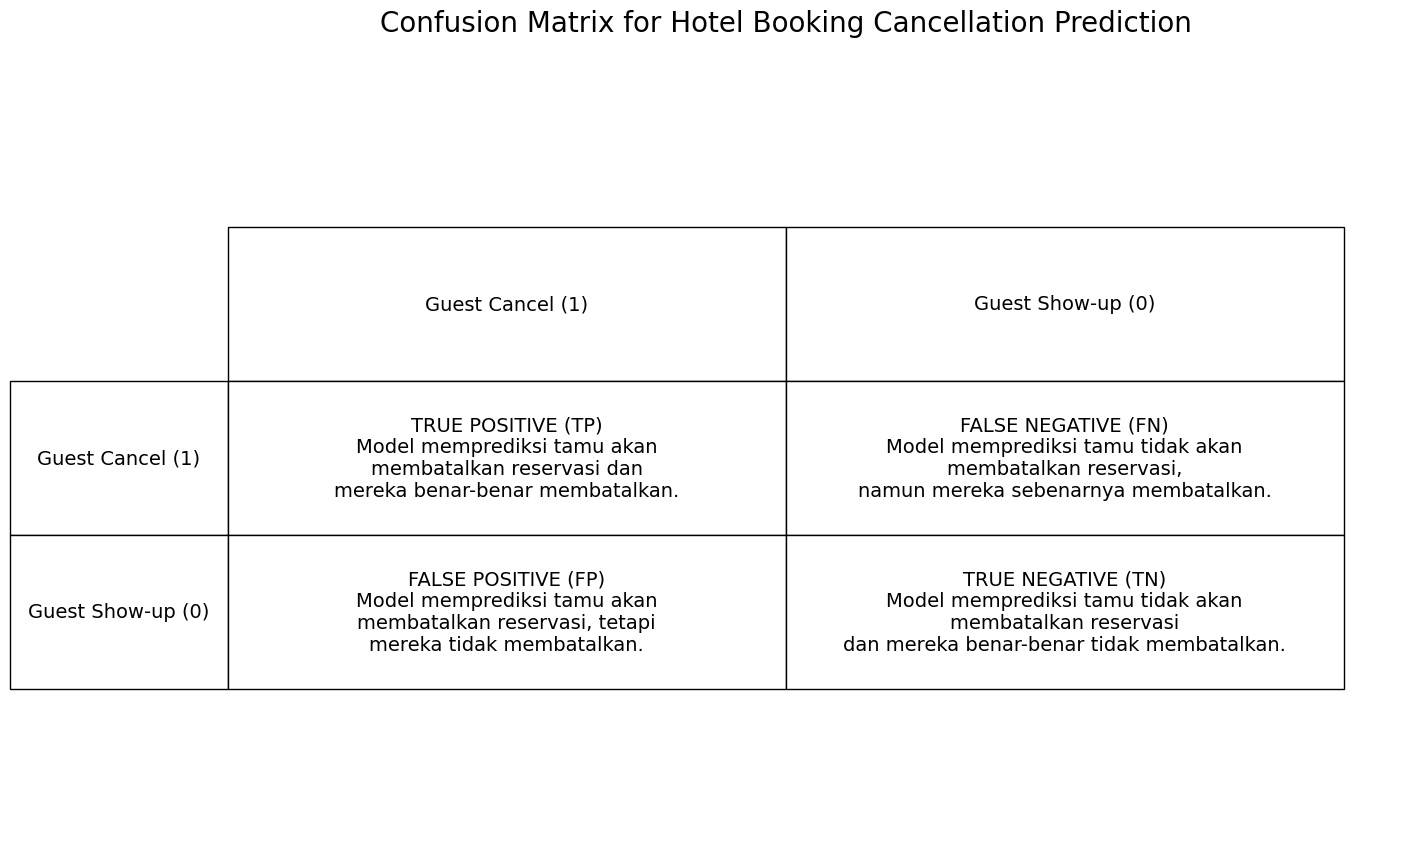

In [149]:
import matplotlib.pyplot as plt
import pandas as pd

# Data untuk tabel dengan teks yang dipisah dalam beberapa baris
data = [
    ["TRUE POSITIVE (TP)\nModel memprediksi tamu akan\nmembatalkan reservasi dan\nmereka benar-benar membatalkan.",
     "FALSE NEGATIVE (FN)\nModel memprediksi tamu tidak akan\nmembatalkan reservasi,\nnamun mereka sebenarnya membatalkan."],
    ["FALSE POSITIVE (FP)\nModel memprediksi tamu akan\nmembatalkan reservasi, tetapi\nmereka tidak membatalkan.",
     "TRUE NEGATIVE (TN)\nModel memprediksi tamu tidak akan\nmembatalkan reservasi\ndan mereka benar-benar tidak membatalkan."]
]

# Membuat dataframe
df = pd.DataFrame(data, columns=["Guest Cancel (1)", "Guest Show-up (0)"], index=["Guest Cancel (1)", "Guest Show-up (0)"])

# Membuat plot dan tabel
fig, ax = plt.subplots(figsize=(16, 10))  # Ukuran tabel lebih besar untuk memberi ruang

# Hapus grid
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Membuat tabel di plot
table = ax.table(cellText=df.values, rowLabels=df.index, colLabels=df.columns, loc='center', cellLoc='center')

# Pengaturan ukuran font agar lebih sesuai
table.auto_set_font_size(False)
table.set_fontsize(14)  # Ukuran font lebih besar
table.scale(3, 3)  # Skalakan tabel untuk memperbesar

# Mengatur lebar dan tinggi kolom untuk menghindari teks tumpang tindih
for key, cell in table.get_celld().items():
    cell.set_text_props(ha='center', va='center')  # Teks di tengah
    cell.set_height(0.2)  # Atur tinggi sel lebih besar
    cell.set_width(0.45)  # Atur lebar sel lebih besar

# Judul
ax.set_title('Confusion Matrix for Hotel Booking Cancellation Prediction', fontsize=20, pad=30)

plt.show()


Summary

Kesalahan Tipe 1: False Positive (tamu diprediksi akan membatalkan reservasi, tetapi sebenarnya tidak)

Konsekuensi: Risiko tinggi terjadinya overbooking (pemesanan berlebih), di mana hotel memesan kamar lebih dari jumlah sebenarnya, yang bisa menyebabkan kekacauan dalam manajemen kamar.

Kesalahan Tipe 2: False Negative (tamu diprediksi tidak akan membatalkan reservasi, tetapi sebenarnya membatalkan)

Konsekuensi: Kehilangan pendapatan karena kamar tidak terpakai. Kamar yang kosong akibat pembatalan pada saat terakhir tidak bisa dimanfaatkan untuk tamu lain.

**Analisis Metrik**

Berdasarkan evaluasi metrik di atas, kita perlu meminimalkan False Negative Rate (meminimalkan risiko kehilangan pendapatan). Jika model gagal meminimalkan False Negative Rate (Kesalahan Tipe 2), ini berarti tamu yang seharusnya membatalkan reservasi diprediksi oleh model sebagai tamu yang tidak akan membatalkan. Jika hal ini terjadi, pemilik bisnis akan mengalami kehilangan pelanggan, yang dapat meningkatkan risiko kehilangan pendapatan karena kamar yang tidak terpakai, padahal kamar tersebut bisa dijual kembali atau dipublikasikan ulang di agen perjalanan online (Online Travel Agencies atau OTA).

Namun, kita juga harus memperhatikan nilai False Positive (Kesalahan Tipe 1) dalam hasil prediksi. Jika nilainya tinggi, ini menunjukkan bahwa model secara salah memprediksi tamu yang akan membatalkan reservasi, padahal mereka tidak membatalkan. Ini akan menyebabkan risiko tinggi terjadinya overbooking. Ketika model memprediksi tamu akan membatalkan reservasi, kita akan mengambil tindakan dengan menjual kembali atau mempublikasikan ulang kamar tersebut baik secara online maupun offline. Jika prediksi ini salah dan tamu lain telah memesan kamar yang sama, maka akan terjadi overbooking jika tidak ada kamar serupa yang tersedia.

Dengan demikian, model yang kita inginkan adalah model yang mampu memberikan prediksi akurat pada kelas positif dengan recall score yang lebih tinggi untuk menghindari kehilangan pendapatan dan kapasitas yang tidak terpakai. Namun, kita juga harus memastikan bahwa precision score memiliki ukuran yang baik untuk menghindari risiko overbooking. Oleh karena itu, kita harus menyeimbangkan antara precision dan recall pada kelas positif (kelas tamu yang membatalkan reservasi).

Metrik utama untuk prediksi adalah f1-score, tetapi kita juga perlu memperhatikan recall score dan memastikan bahwa nilainya lebih tinggi daripada precision. Selain itu, penggunaan f1-score bertujuan untuk mengatasi ketidakseimbangan data antara kelas positif (tamu yang membatalkan) dan kelas negatif (tamu yang tidak membatalkan atau Stayed).

In [150]:
# numeric calculation
import numpy as np
import statistics as st

# dataframe
import pandas as pd
from collections import Counter

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# data splitting 
from sklearn.model_selection import train_test_split, cross_val_score

# preprocessing
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics

# tuning
import optuna

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')


### 1.6 Pemahaman Data
Dataset ini berisi informasi pemesanan tamu hotel, yang akan digunakan untuk memprediksi apakah suatu pemesanan akan dibatalkan atau tidak. Model prediksi ini akan membantu pihak hotel untuk mengurangi risiko kehilangan pendapatan akibat pembatalan pemesanan dan juga meminimalkan risiko overbooking.

Beberapa kolom kunci dalam dataset ini meliputi:

- country: Kode negara asal tamu yang melakukan pemesanan.
- market_segment: Segmen pasar dari mana pemesanan berasal, seperti melalui agen perjalanan offline (Offline TA/TO) atau agen perjalanan online (Online TA).
- previous_cancellations: Jumlah pemesanan yang pernah dibatalkan oleh tamu tersebut sebelumnya.
- booking_changes: Jumlah perubahan yang dilakukan oleh tamu pada pemesanan mereka.
- deposit_type: Jenis deposit yang digunakan, apakah tidak ada deposit (No Deposit), tidak dapat dikembalikan (Non Refundable), atau dapat dikembalikan (Refundable).
- days_in_waiting_list: Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi.
- customer_type: Jenis pelanggan, seperti Transient, Contract, atau Group.
- reserved_room_type: Tipe kamar yang dipesan oleh tamu.
- required_car_parking_spaces: Jumlah tempat parkir yang diminta oleh tamu.
- total_of_special_requests: Jumlah permintaan khusus yang diajukan tamu saat memesan.
- is_canceled: Status pembatalan pemesanan (1 = dibatalkan, 0 = tidak dibatalkan).

Dataset ini memberikan berbagai informasi yang dapat digunakan untuk menganalisis pola pembatalan pemesanan, memahami perilaku pelanggan, dan mengoptimalkan strategi manajemen hotel berdasarkan perilaku pelanggan yang berbeda.

In [151]:
# Membaca dataset
data_path = "/Users/rouliamarthagabriellatambunan/Documents/purwadhika/modul 3/capstone 3/./data_hotel_booking_demand.csv"
df_hotel= pd.read_csv(data_path)
# data train details

# data train details

list_item = []
for col in df_hotel.columns:
    list_item.append([col, df_hotel[col].dtype, len(df_hotel), 
    df_hotel[col].isna().sum(), round((df_hotel[col].isna().sum()/len(df_hotel[col]))*100,2),
    df_hotel[col].nunique(), list(df_hotel[col].drop_duplicates().sample(2, replace=True).values)])

df_items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value %', 'Number of Unique', 'Unique Sample'],
    data = list_item)

df_items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,previous_cancellations,int64,83573,0,0.00,15,"[1, 19]"
1,booking_changes,int64,83573,0,0.00,19,"[15, 9]"
2,days_in_waiting_list,int64,83573,0,0.00,115,"[87, 165]"
3,required_car_parking_spaces,int64,83573,0,0.00,5,"[8, 0]"
4,total_of_special_requests,int64,83573,0,0.00,6,"[5, 0]"
5,is_canceled,int64,83573,0,0.00,2,"[0, 1]"
6,country,object,83573,351,0.42,162,"[MKD, GBR]"
7,market_segment,object,83573,0,0.00,8,"[Complementary, Direct]"
8,deposit_type,object,83573,0,0.00,3,"[Non Refund, Non Refund]"
9,customer_type,object,83573,0,0.00,4,"[Group, Transient-Party]"


1. Kolom Numerik:
    - previous_cancellations: Menghitung jumlah pembatalan pemesanan sebelumnya yang dilakukan oleh tamu. Tidak ada nilai yang hilang, dengan 15 nilai unik.
    - booking_changes: Menyimpan informasi tentang perubahan pemesanan, tidak ada nilai yang hilang, dengan 19 nilai unik.
    - days_in_waiting_list: Menunjukkan jumlah hari yang dihabiskan tamu dalam daftar tunggu sebelum konfirmasi pemesanan. Tidak ada nilai hilang, dengan 115 nilai unik.
    - required_car_parking_spaces: Menghitung jumlah tempat parkir yang diminta oleh tamu. Tidak ada nilai hilang, dengan 5 nilai unik.
    - total_of_special_requests: Menunjukkan jumlah permintaan khusus yang diajukan oleh tamu selama pemesanan. Tidak ada nilai yang hilang, dengan 6 nilai unik.
    - is_canceled: Variabel biner yang menunjukkan apakah pemesanan dibatalkan atau tidak (1 untuk dibatalkan, 0 untuk tidak dibatalkan). Tidak ada nilai yang hilang, dengan 2 nilai unik.

2. Kolom Kategorikal:
    - country: Menunjukkan kode negara asal tamu yang melakukan pemesanan. Ada 351 nilai yang hilang (0.42%), dengan 162 nilai unik.
    - market_segment: Menyimpan informasi segmen pasar dari mana pemesanan berasal (contoh: Offline TA/TO, Online TA). Tidak ada nilai hilang, dengan 8 nilai unik.
    - deposit_type: Menunjukkan jenis deposit yang digunakan oleh tamu (contoh: Non Refund, Refundable). Tidak ada nilai hilang, dengan 3 nilai unik.
    - customer_type: Mengidentifikasi jenis pelanggan (contoh: Transient, Group). Tidak ada nilai hilang, dengan 4 nilai unik.
    - reserved_room_type: Menunjukkan tipe kamar yang dipesan oleh tamu. Tidak ada nilai hilang, dengan 10 nilai unik.

Ringkasan Data :
* Datasheet memiliki 83.573 baris/observasi dan 11 fitur/kolom. Satu-satunya fitur yang memiliki nilai yang hilang dalam data train adalah kolom country, dengan persentase 0,42% dari total 83.573 observasi.
* Datasheet memiliki 5 data kategorikal, yaitu country, market_segment, deposit_type, customer_type, dan reserved_room_type.
* Fitur numerik dalam data kami meliputi: previous_cancellations, booking_changes, days_in_waiting_list, required_car_parking_spaces, dan total_of_special_requests.
* Fitur yang akan dijadikan target dalam analisis ini adalah is_canceled, di mana 0 menunjukkan pemesanan tidak dibatalkan dan 1 menunjukkan pemesanan dibatalkan.



    Deskripsi Fitur
* country: Negara asal tamu. Kategori negara ini diwakili dalam format ISO  ISO 3166-1.
* market_segment: Sekelompok orang yang memiliki satu atau lebih karakteristik yang sama dan dikelompokkan untuk tujuan pemasaran.
    - TA: Agen perjalanan (Travel Agents)
    - TO: Operator tur (Tour Operators)
* previous_cancellations: Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini.
* booking_changes: Jumlah perubahan atau amandemen yang dilakukan terhadap pemesanan sejak pemesanan dimasukkan ke dalam sistem manajemen properti (Property Management System, PMS) hingga saat check-in atau pembatalan.
* deposit_type: Indikasi apakah pelanggan melakukan deposit untuk menjamin pemesanan. Variabel ini dapat memiliki tiga kategori:
    - No Deposit: Tidak ada deposit yang dilakukan.
    - Non Refund: Deposit dilakukan dengan nilai setara biaya keseluruhan menginap.
    - Refundable: Deposit dilakukan dengan nilai di bawah total biaya menginap.
* day_in_waiting_list: Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan.
* customer_type:
    - Contract: Pemesanan terkait dengan alokasi atau jenis kontrak lainnya.
    - Group: Pemesanan yang terkait dengan grup.
    - Transient: Pemesanan yang bukan bagian dari grup atau kontrak, dan tidak terkait dengan pemesanan transient lainnya.
    - Transient-party: Pemesanan transient yang terkait dengan setidaknya satu pemesanan transient lainnya.
* reserved_room_type: Kode tipe kamar yang dipesan. Untuk alasan kerahasiaan, kode digunakan sebagai pengganti nama atau tipe kamar.
* required_car_parking_spaces: Jumlah tempat parkir mobil yang diminta oleh pelanggan.
* total_of_special_requests: Jumlah permintaan khusus yang diajukan oleh pelanggan (misalnya, tempat tidur kembar atau lantai atas).
* is_canceled:
    - 1: Dibatalkan.
    - 0: Tidak dibatalkan.

## 2. Analisis Data Eksploratif (EDA)
Sebelum memulai Analisis Data Eksploratif (EDA), akan bermanfaat untuk membedakan kolom mana yang bersifat kategorikal dan mana yang bersifat numerik. Hal ini berguna untuk menentukan jenis visualisasi yang bisa dilakukan nantinya.

Dari data yang ada, kita melihat ada 11 kolom yang mengandung 5 fitur kategorikal dan 6 fitur numerik sebagai berikut:



In [152]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [153]:
df_hotel.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
previous_cancellations,83573.0,0.086798,0.841011,0.0,0.0,0.0,0.0,26.0
booking_changes,83573.0,0.220897,0.648635,0.0,0.0,0.0,0.0,21.0
days_in_waiting_list,83573.0,2.330561,17.673051,0.0,0.0,0.0,0.0,391.0
required_car_parking_spaces,83573.0,0.062999,0.246919,0.0,0.0,0.0,0.0,8.0
total_of_special_requests,83573.0,0.573211,0.795163,0.0,0.0,0.0,1.0,5.0
is_canceled,83573.0,0.368277,0.482340,0.0,0.0,0.0,1.0,1.0


* Fitur Kategorikal: country, market_segment, deposit_type, customer_type, reserved_room_type.
* Fitur Numerik: previous_cancellations, booking_changes, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests, is_canceled (target).

### 2.1 Korelasi
Untuk mempersingkat proses EDA, kita tidak akan melakukan EDA untuk seluruh kolom tetapi hanya untuk kolom-kolom yang memiliki pengaruh besar terhadap variabel target, yaitu is_canceled. Dari hasil tes korelasi statistik di bawah ini, kita menyimpulkan bahwa fitur numerik dengan korelasi tertinggi adalah total_of_special_requests (24%), required_car_parking_spaces (19%), dan booking_changes (15%). Oleh karena itu, kita hanya akan menganalisis 3 fitur numerik ini, dan kita akan melakukan analisis untuk semua kategori setelahnya.

In [154]:
# Mengambil hanya kolom numerik
numerical_columns = df_hotel.select_dtypes(include=['int64', 'float64']) #hanya kolom yang memiliki tipe data numerik

# Menghitung korelasi antar kolom numerik
correlation_matrix = numerical_columns.corr()

# Menampilkan matriks korelasi
correlation_matrix


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
previous_cancellations,1.000000,-0.027361,0.006895,-0.018208,-0.048026,0.109598
booking_changes,-0.027361,1.000000,-0.010687,0.068508,0.055748,-0.145746
days_in_waiting_list,0.006895,-0.010687,1.000000,-0.030333,-0.083275,0.056203
required_car_parking_spaces,-0.018208,0.068508,-0.030333,1.000000,0.083678,-0.194807
total_of_special_requests,-0.048026,0.055748,-0.083275,0.083678,1.000000,-0.235993
is_canceled,0.109598,-0.145746,0.056203,-0.194807,-0.235993,1.000000


In [155]:
# Menampilkan matriks korelasi
print(correlation_matrix)

                             previous_cancellations  booking_changes  \
previous_cancellations                     1.000000        -0.027361   
booking_changes                           -0.027361         1.000000   
days_in_waiting_list                       0.006895        -0.010687   
required_car_parking_spaces               -0.018208         0.068508   
total_of_special_requests                 -0.048026         0.055748   
is_canceled                                0.109598        -0.145746   

                             days_in_waiting_list  \
previous_cancellations                   0.006895   
booking_changes                         -0.010687   
days_in_waiting_list                     1.000000   
required_car_parking_spaces             -0.030333   
total_of_special_requests               -0.083275   
is_canceled                              0.056203   

                             required_car_parking_spaces  \
previous_cancellations                         -0.018208   
boo

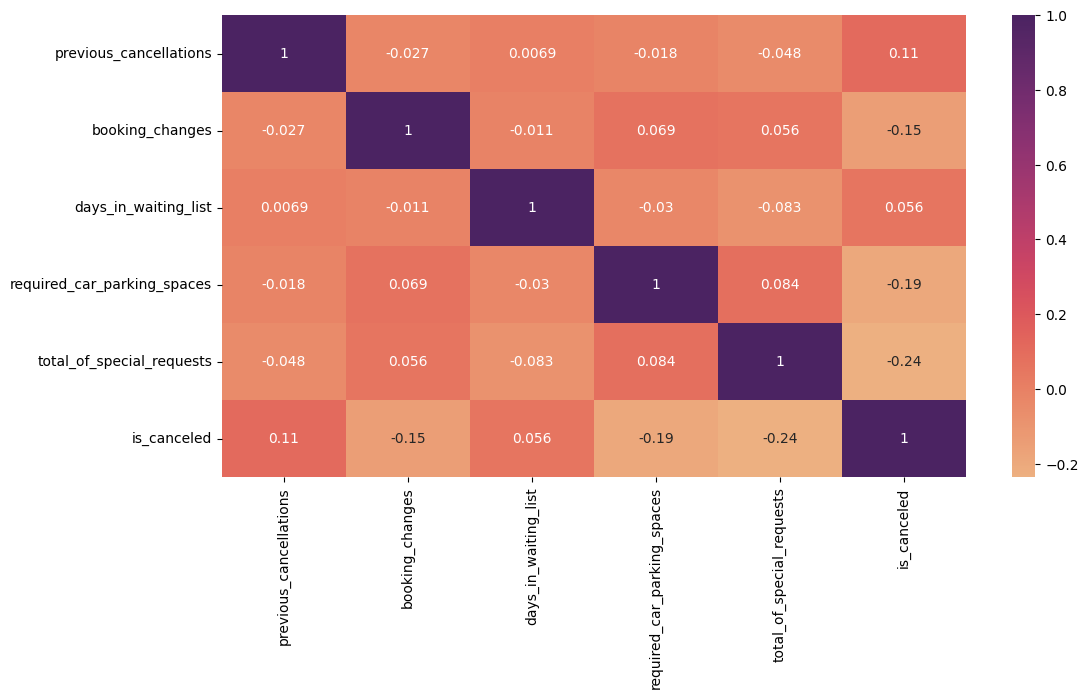

In [156]:
# Assuming df_hotel is your DataFrame
numeric_cols = df_hotel.select_dtypes(include=['number'])

# Now create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='flare')
plt.show()


    Berdasarkan heatmap korelasi yang ditampilkan, berikut beberapa poin yang dapat diambil:

1. Hubungan antara variabel numerik dengan is_canceled:
* total_of_special_requests memiliki korelasi negatif yang cukup signifikan dengan is_canceled (-0.24). Ini berarti semakin banyak permintaan khusus yang diajukan tamu, semakin kecil kemungkinan pemesanan tersebut dibatalkan.
* required_car_parking_spaces juga memiliki korelasi negatif dengan is_canceled (-0.19), yang menunjukkan bahwa tamu yang meminta tempat parkir lebih cenderung tidak membatalkan pemesanan.
* booking_changes memiliki korelasi negatif (-0.15) dengan pembatalan, yang berarti semakin banyak perubahan yang dilakukan, semakin besar kemungkinan pemesanan dibatalkan.
* previous_cancellations memiliki korelasi positif kecil dengan is_canceled (0.11), yang menunjukkan bahwa tamu yang pernah membatalkan pemesanan sebelumnya lebih cenderung membatalkan pemesanan lagi.
2. Hubungan antar fitur numerik lainnya:
* Hubungan antara fitur numerik lainnya relatif kecil dan tidak memiliki korelasi yang kuat. Hal ini menunjukkan bahwa fitur-fitur tersebut tidak saling berkaitan secara signifikan.
3. Pengaruh paling signifikan pada is_canceled:
* Fitur yang memiliki pengaruh terbesar terhadap pembatalan adalah total_of_special_requests dan required_car_parking_spaces, keduanya menunjukkan bahwa semakin tinggi nilai pada fitur ini, semakin kecil kemungkinan pembatalan pemesanan.
Heatmap ini membantu untuk mengidentifikasi fitur mana yang berpotensi mempengaruhi variabel target (is_canceled) dan mana yang bisa dianggap kurang relevan. Anda bisa fokus pada fitur-fitur yang memiliki korelasi kuat untuk melakukan analisis dan model prediksi lebih lanjut.

In [157]:
# Memilih hanya kolom numerik
numeric_cols = df_hotel.select_dtypes(include=['int64', 'float64'])

# Menghitung korelasi dengan kolom 'is_canceled'
correlation_with_is_canceled = numeric_cols.corr()['is_canceled'].abs().sort_values(ascending=False)

# Menampilkan hasil
print(correlation_with_is_canceled)


is_canceled                    1.000000
total_of_special_requests      0.235993
required_car_parking_spaces    0.194807
booking_changes                0.145746
previous_cancellations         0.109598
days_in_waiting_list           0.056203
Name: is_canceled, dtype: float64


1. Variabel Target: is_canceled
Variabel is_canceled merupakan variabel target, di mana nilai 1 menunjukkan bahwa pemesanan dibatalkan dan 0 menunjukkan bahwa pemesanan tidak dibatalkan. Korelasi yang dihitung menunjukkan seberapa kuat hubungan linear antara fitur-fitur numerik lainnya dengan apakah pemesanan dibatalkan atau tidak.

2. Interpretasi Korelasi
Berikut adalah interpretasi untuk setiap fitur dan korelasinya dengan variabel is_canceled:

* total_of_special_requests (0.235993):
    - Korelasi positif yang moderat (23.6%). Ini menunjukkan bahwa semakin banyak permintaan khusus yang diajukan tamu, semakin kecil kemungkinan pemesanan dibatalkan. Ini mungkin karena tamu yang meminta lebih banyak permintaan khusus cenderung lebih serius atau memiliki komitmen yang lebih tinggi untuk datang ke hotel.
* required_car_parking_spaces (0.194807):
    - Korelasi positif lemah hingga moderat (19.5%). Ini menunjukkan bahwa tamu yang memesan lebih banyak tempat parkir cenderung tidak membatalkan pemesanan mereka. Hal ini masuk akal, karena tamu yang membutuhkan tempat parkir mungkin lebih berencana untuk datang.
* booking_changes (0.145746):
    - Korelasi positif lemah (14.6%). Ini menunjukkan bahwa semakin banyak perubahan yang dilakukan pada pemesanan, semakin besar kemungkinan pemesanan dibatalkan. Perubahan pemesanan mungkin mencerminkan ketidakpastian atau rencana yang berubah dari tamu, yang dapat mengarah pada pembatalan.
* previous_cancellations (0.109598):
    - Korelasi positif kecil (10.96%). Tamu yang memiliki riwayat pembatalan sebelumnya sedikit lebih mungkin untuk membatalkan pemesanan mereka lagi, meskipun korelasinya tidak sangat kuat.
* days_in_waiting_list (0.056203):
    - Korelasi sangat lemah (5.6%). Ini menunjukkan bahwa jumlah hari yang dihabiskan dalam daftar tunggu tidak memiliki hubungan yang signifikan dengan pembatalan pemesanan. Variabel ini mungkin kurang relevan dalam memprediksi apakah pemesanan akan dibatalkan atau tidak.

Kesimpulan dari Korelasi : 
* Fitur total_of_special_requests, required_car_parking_spaces, dan booking_changes memiliki korelasi yang lebih tinggi dengan pembatalan pemesanan dibandingkan fitur lainnya. Fitur-fitur ini berpotensi menjadi faktor penting dalam memprediksi apakah pemesanan akan dibatalkan atau tidak.
* previous_cancellations juga menunjukkan beberapa hubungan, meskipun korelasinya tidak terlalu kuat.
* days_in_waiting_list memiliki korelasi yang sangat rendah, yang menunjukkan bahwa fitur ini mungkin tidak terlalu relevan untuk memprediksi pembatalan pemesanan.

### 2.2 Persentase Pembatalan
Menurut hasil analisis data, kita ingin mengetahui berapa persentase pemesanan yang dibatalkan (is_canceled = 1) dibandingkan dengan pemesanan yang dikonfirmasi atau tidak dibatalkan (is_canceled = 0). Persentase pembatalan ini memberikan gambaran umum tentang seberapa sering pemesanan dibatalkan di hotel tersebut. Berdasarkan grafik di bawah, kita akan mengetahui persentase pemesanan yang dikonfirmasi dan yang dibatalkan.

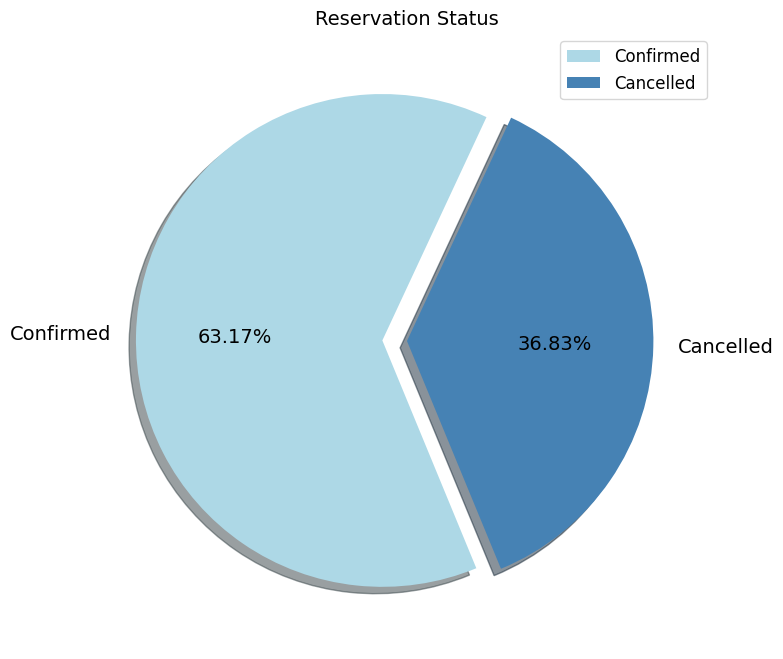

In [158]:
plt.figure(figsize= (14, 8))
plt.pie(df_hotel['is_canceled'].value_counts(),
                    autopct='%1.2f%%',
                    explode = [0.1,0],
                    labels = ['Confirmed', 'Cancelled'],
                    shadow = True, 
                    textprops = {'fontsize':14},
                    colors = ['lightblue', 'steelblue'],
                    startangle = 65
)
plt.title('Reservation Status', fontsize = 14)
plt.legend(fontsize = 12, loc = 'upper right')
plt.show()

### 2.3 Analisis Fitur Kategorikal
Seperti disebutkan sebelumnya, terdapat 5 fitur kategorikal dalam dataset ini: country, market_segment, deposit_type, customer_type, dan reserved_room_type. Kita akan mengecek distribusi umum dari masing-masing fitur kategorikal ini berdasarkan nilai dari kolom is_canceled (apakah pemesanan dibatalkan atau tidak).

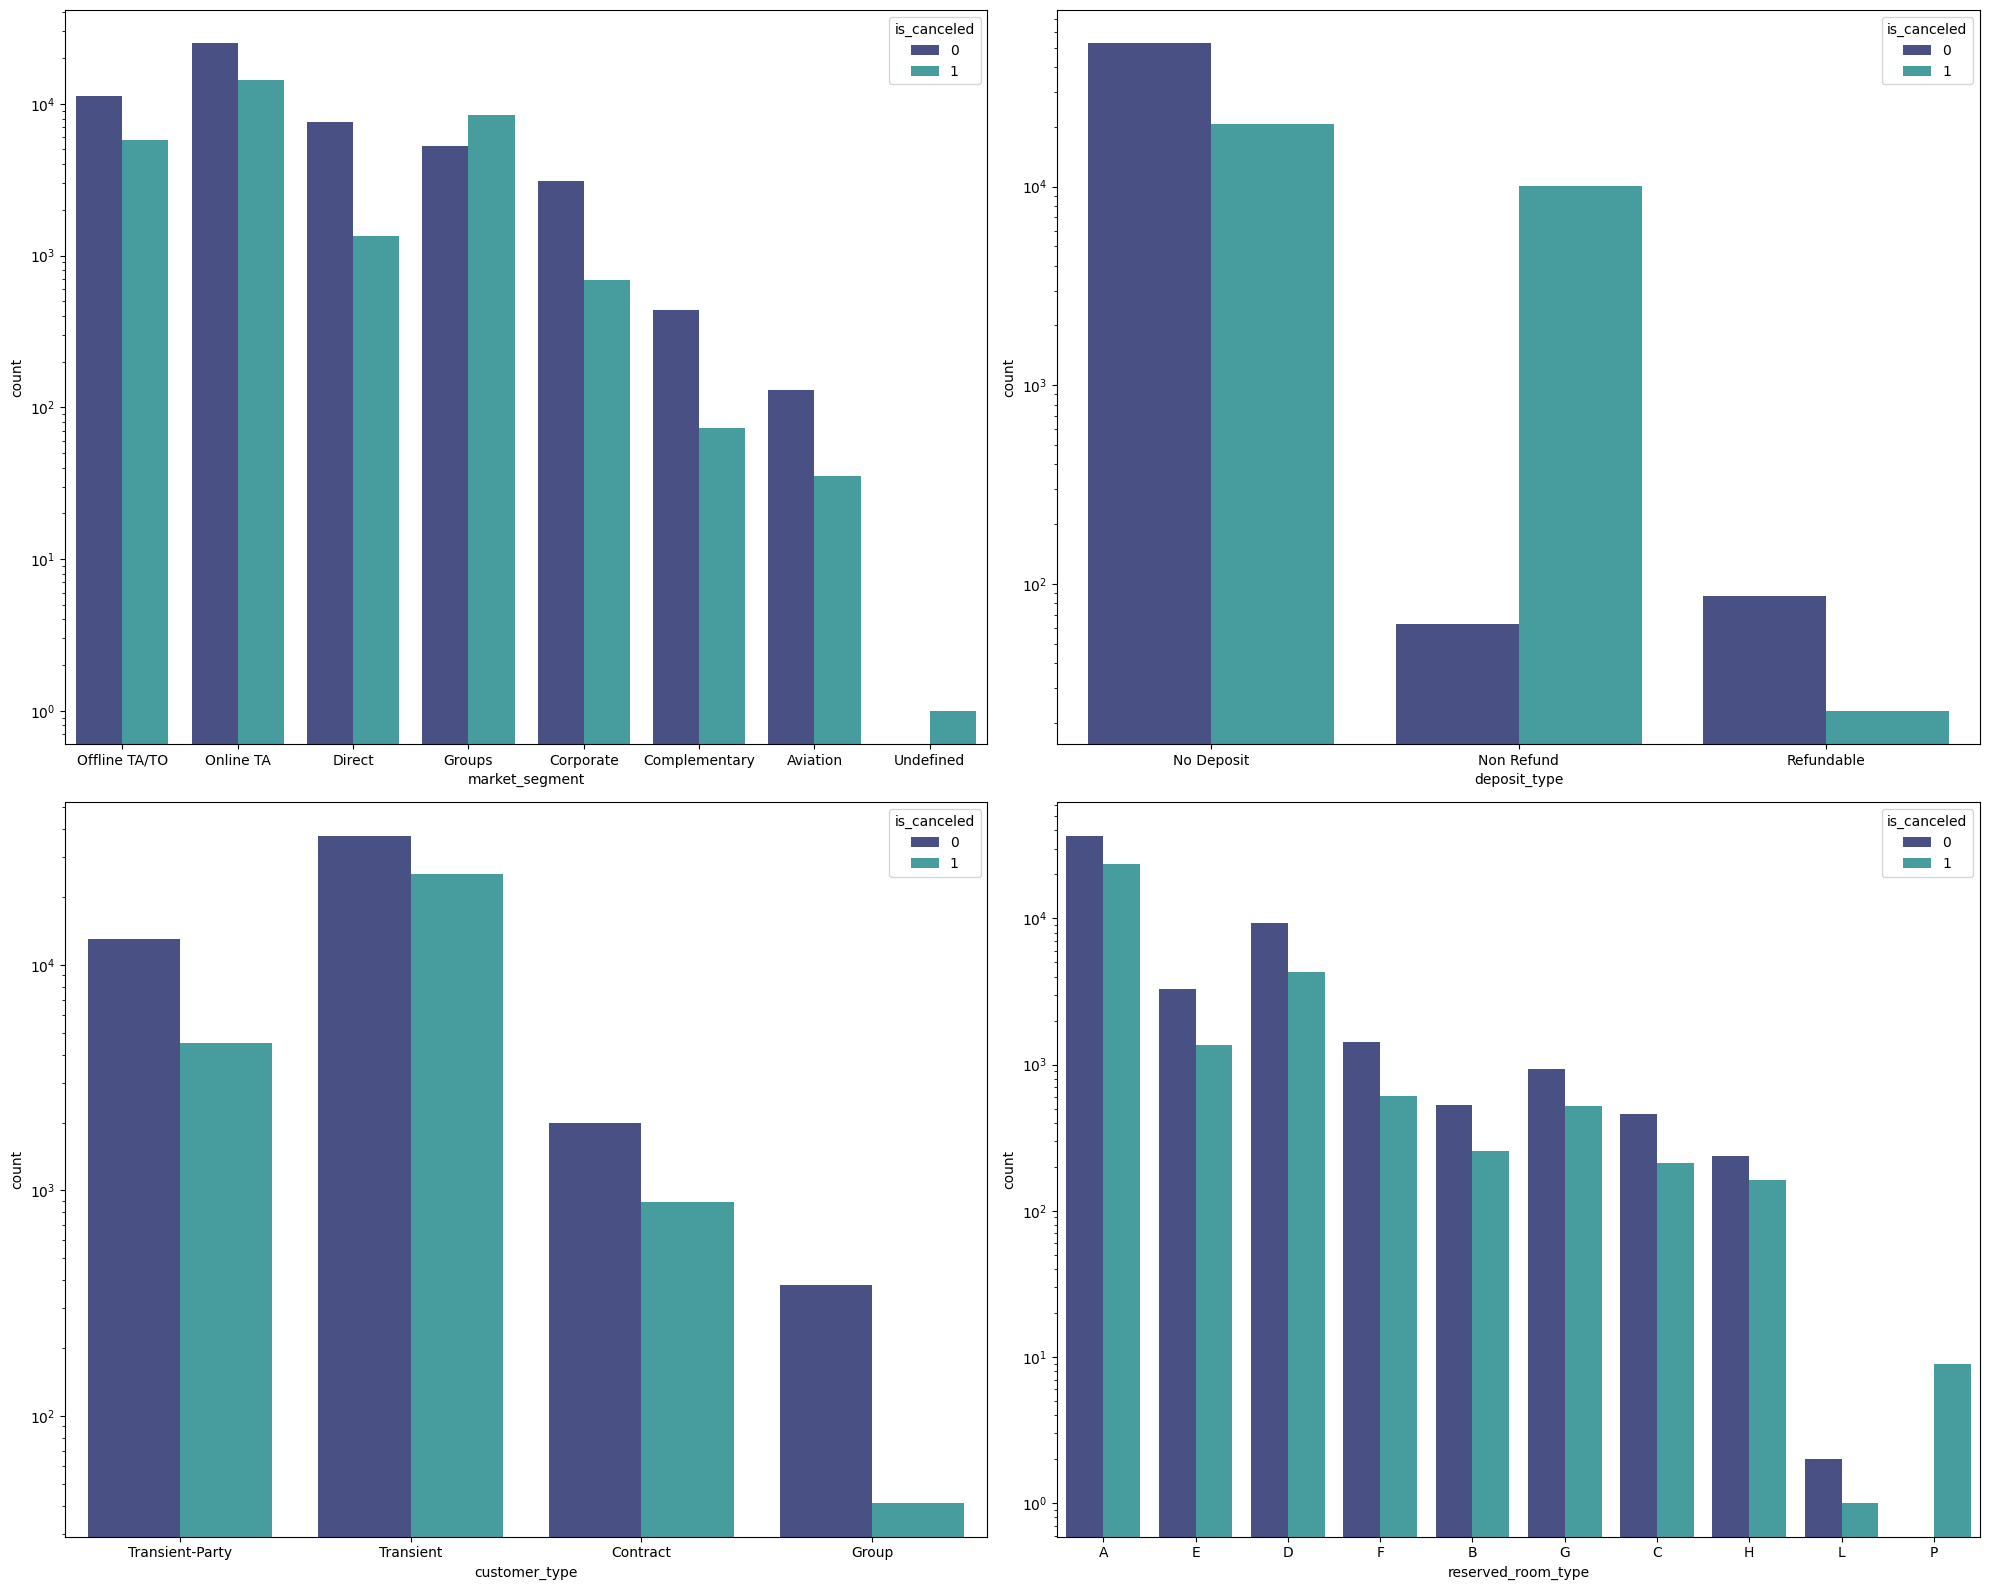

In [159]:
# Pilih semua fitur yang memiliki tipe data object
categorical_var = df_hotel.dtypes[df_hotel.dtypes == object][1:].index.tolist()

# Buat 4 plot kosong
fig, ax = plt.subplots(2, 2, figsize=(20, 16))

# Iterasi setiap variabel kategorikal dan visualisasikan dalam countplot
for ix, ctg in enumerate(categorical_var):
    g = sns.countplot(x=ctg, hue='is_canceled', data=df_hotel, palette='mako', ax=ax.flatten()[ix])
    
    # Terapkan skala logaritmik pada sumbu Y
    ax.flatten()[ix].set_yscale('log')
    
# Tampilkan plot
plt.tight_layout()
plt.show()

    Berdasarkan output grafik di atas, kita dapat melihat analisis dari beberapa fitur kategorikal dari dataset data_hotel_booking_demand.csv yang dibagi berdasarkan variabel target is_canceled (0 = tidak dibatalkan, 1 = dibatalkan). Berikut adalah deskripsi setiap plot dan interpretasinya:

1. Market Segment
Grafik ini menunjukkan distribusi segmen pasar (market_segment) untuk pemesanan yang dikonfirmasi (is_canceled = 0) dan yang dibatalkan (is_canceled = 1).

* Offline TA/TO dan Online TA (Online Travel Agencies) adalah segmen yang paling sering digunakan oleh tamu.
* Online TA memiliki jumlah pembatalan yang cukup besar (tinggi pada bagian is_canceled = 1), menunjukkan bahwa pemesanan melalui segmen ini cenderung lebih sering dibatalkan.
* Sebaliknya, segmen Direct (pemesanan langsung) memiliki lebih banyak pemesanan yang tidak dibatalkan (is_canceled = 0).
* Corporate dan Complementary juga memiliki persentase pemesanan yang relatif kecil, baik yang dikonfirmasi maupun yang dibatalkan.

2. Deposit Type
Grafik ini menunjukkan distribusi jenis deposit (deposit_type) yang digunakan oleh tamu.

* No Deposit: Mayoritas tamu tidak memberikan deposit, dan sebagian besar pemesanan ini berakhir dengan pembatalan (is_canceled = 1).
* Non Refundable: Pemesanan dengan deposit Non Refundable lebih jarang dibatalkan, yang logis karena tamu akan kehilangan deposit jika membatalkan.
* Refundable: Tamu yang memilih deposit Refundable lebih jarang membatalkan dibandingkan No Deposit, tetapi lebih sering dibandingkan Non Refundable.

3. Customer Type
Grafik ini menunjukkan distribusi jenis pelanggan (customer_type) berdasarkan pembatalan.

* Transient (pelanggan yang hanya menginap untuk satu kali kunjungan) memiliki persentase pembatalan yang cukup tinggi.
* Transient-Party: Grup tamu yang merupakan bagian dari pesta besar cenderung lebih sedikit membatalkan pemesanan dibandingkan pelanggan individual.
* Contract: Pelanggan kontrak memiliki pembatalan yang sangat rendah, mungkin karena komitmen jangka panjang mereka dengan hotel.
* Group: Pemesanan oleh grup (kelompok besar) juga memiliki tingkat pembatalan yang lebih tinggi dibandingkan jenis kontrak, tetapi lebih rendah dibandingkan pelanggan individual.

4. Reserved Room Type
Grafik ini menunjukkan tipe kamar yang dipesan (reserved_room_type) oleh tamu berdasarkan apakah pemesanan dibatalkan atau tidak.

* Tipe kamar A adalah tipe kamar yang paling sering dipesan, tetapi memiliki proporsi pembatalan yang relatif tinggi.
* Tipe kamar G, H, dan L lebih jarang dipesan, dan tipe P terlihat sangat jarang dipesan dengan sedikit atau tidak ada pembatalan.
* D, E, dan C memiliki jumlah pemesanan yang lebih kecil, tetapi proporsi pembatalannya tidak terlalu signifikan.

**Kesimpulan Umum:**
* Market Segment: Pemesanan yang dilakukan melalui Online Travel Agencies (OTA) lebih sering dibatalkan dibandingkan pemesanan langsung atau melalui agen perjalanan offline.
* Deposit Type: Tamu yang tidak memberikan deposit lebih cenderung membatalkan pemesanan, sedangkan tamu dengan Non Refundable deposit hampir tidak pernah membatalkan.
* Customer Type: Pelanggan Transient lebih cenderung membatalkan dibandingkan pelanggan Contract atau Group.
* Reserved Room Type: Tipe kamar A sering dipesan, tetapi memiliki tingkat pembatalan yang lebih tinggi, sedangkan tipe kamar yang jarang dipesan seperti P memiliki tingkat pembatalan yang sangat rendah.

### 2.4 Analisis Fitur Numerik
Sekarang, mari kita lihat analisis distribusi dari fitur numerik sesuai dengan nilai dari kolom is_canceled (apakah pemesanan dibatalkan atau tidak). Ini akan membantu kita memahami bagaimana distribusi fitur-fitur numerik seperti jumlah permintaan khusus, jumlah perubahan pemesanan, dan fitur lainnya memengaruhi pembatalan pemesanan.

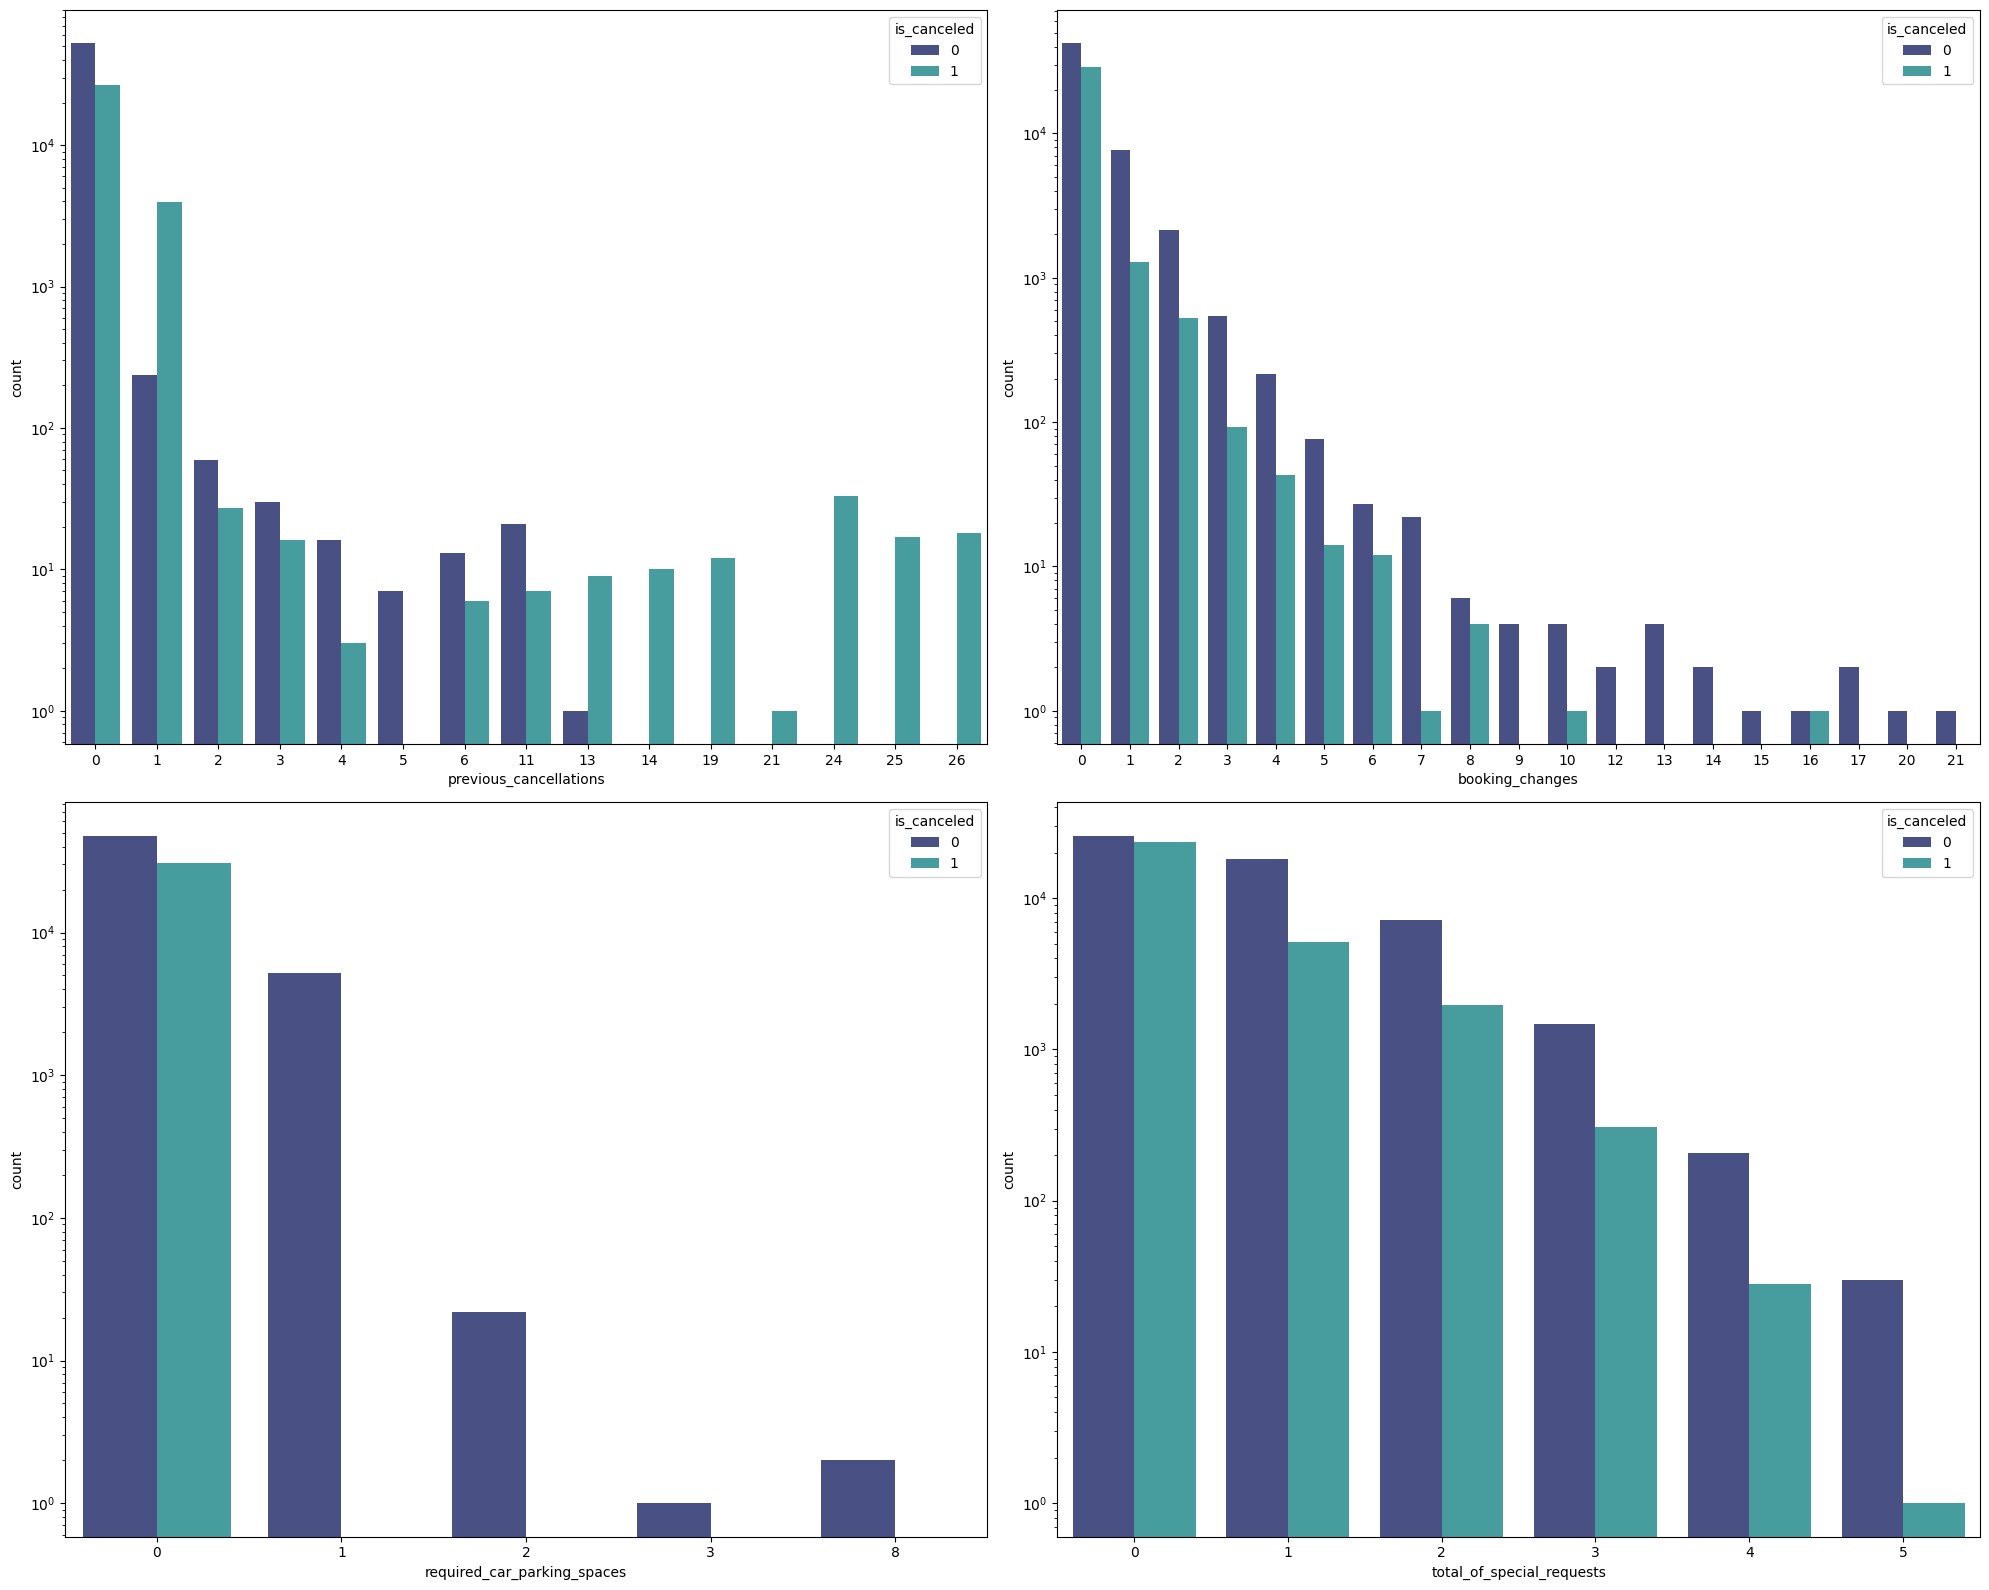

In [160]:
# Memilih fitur numerik untuk dianalisis
numeric_var = df_hotel[['previous_cancellations', 'booking_changes', 
                        'required_car_parking_spaces', 'total_of_special_requests']]

# Membuat 4 plot kosong dengan ukuran 2x2
fig, ax = plt.subplots(2, 2, figsize=(20, 16))

# Iterasi setiap variabel numerik dan visualisasikan dalam countplot
for ix, num in enumerate(numeric_var):
    g = sns.countplot(x=num, hue='is_canceled', data=df_hotel, palette='mako', ax=ax.flatten()[ix])
    
    # Terapkan skala logaritmik pada sumbu Y
    ax.flatten()[ix].set_yscale('log')

# Menampilkan plot
plt.tight_layout()
plt.show()


1. Grafik previous_cancellations:
* Deskripsi: Grafik ini menunjukkan distribusi jumlah pembatalan sebelumnya (previous_cancellations) berdasarkan apakah pemesanan saat ini dibatalkan atau tidak (is_canceled).
* Interpretasi:
    - Sebagian besar pemesanan datang dari tamu yang tidak memiliki riwayat pembatalan sebelumnya (nilai 0 pada sumbu x), dan sebagian besar dari mereka tidak membatalkan pemesanan saat ini (kategori is_canceled = 0).
    - Namun, ketika tamu memiliki pembatalan sebelumnya, kemungkinan mereka membatalkan pemesanan saat ini (nilai 1 pada sumbu y untuk is_canceled = 1) meningkat secara signifikan.
    - Sebagian besar pembatalan cenderung terjadi ketika tamu sudah memiliki riwayat pembatalan sebelumnya (nilai > 0).
2. Grafik booking_changes:
* Deskripsi: Grafik ini menunjukkan jumlah perubahan pemesanan (booking_changes) yang dilakukan tamu dan bagaimana hal ini terkait dengan apakah pemesanan dibatalkan atau tidak.
* Interpretasi:
    - Mayoritas pemesanan tidak mengalami perubahan (nilai 0 pada sumbu x), dan sebagian besar pemesanan tersebut tidak dibatalkan (is_canceled = 0).
    - Namun, semakin banyak perubahan yang dilakukan terhadap pemesanan (nilai > 0), semakin besar kemungkinan pemesanan tersebut dibatalkan.
    - Tamu yang melakukan banyak perubahan pemesanan cenderung lebih sering membatalkan pemesanan mereka, meskipun ada beberapa pemesanan yang tetap dikonfirmasi meskipun banyak perubahan yang dilakukan.
3. Grafik required_car_parking_spaces:
* Deskripsi: Grafik ini menampilkan jumlah tempat parkir yang diminta tamu (required_car_parking_spaces) dan hubungan dengan pembatalan pemesanan.
* Interpretasi:
    - Sebagian besar tamu tidak memerlukan tempat parkir (0 pada sumbu x), dan distribusi antara tamu yang membatalkan (is_canceled = 1) dan yang tidak membatalkan (is_canceled = 0) cukup seimbang.
    - Tamu yang meminta tempat parkir tambahan (> 0) cenderung lebih kecil kemungkinannya untuk membatalkan pemesanan mereka.
    - Nilai ekstrim, seperti tamu yang memerlukan lebih dari dua tempat parkir, menunjukkan bahwa hampir semua pemesanan tersebut tetap dikonfirmasi (tidak dibatalkan).
4. Grafik total_of_special_requests:
* Deskripsi: Grafik ini menunjukkan distribusi jumlah permintaan khusus yang dibuat oleh tamu (total_of_special_requests) berdasarkan status pembatalan pemesanan.
* Interpretasi:
    - Tamu yang tidak memiliki permintaan khusus (nilai 0 pada sumbu x) lebih cenderung membatalkan pemesanan (is_canceled = 1).
    - Semakin banyak permintaan khusus yang diajukan oleh tamu, semakin kecil kemungkinan mereka membatalkan pemesanan. Ini mungkin menunjukkan bahwa tamu dengan lebih banyak permintaan khusus lebih terikat pada pemesanan mereka.
    - Tamu dengan banyak permintaan khusus (> 3) memiliki kemungkinan yang lebih tinggi untuk tetap melanjutkan pemesanan.

**Kesimpulan Umum:**
* Grafik ini menunjukkan pola yang cukup jelas terkait fitur numerik yang mempengaruhi keputusan tamu untuk membatalkan atau melanjutkan pemesanan:

    - Tamu yang tidak memiliki riwayat pembatalan dan tidak melakukan banyak perubahan pemesanan cenderung tidak membatalkan.
    - Permintaan khusus dan kebutuhan tempat parkir berperan penting dalam menjaga konfirmasi pemesanan, di mana tamu dengan lebih banyak permintaan khusus atau yang membutuhkan tempat parkir lebih cenderung untuk tetap datang ke hotel.


In [161]:
# top 10 countries cancelled bookings
cancel_num = df_hotel[df_hotel['is_canceled'] == 1]['country'].value_counts().reset_index()
cancel_num.columns = ['country', 'cancelled guests']
cancel_num.head(10)

,country,cancelled guests
0,PRT,19157
1,GBR,1724
2,ESP,1546
3,FRA,1366
4,ITA,935
5,DEU,844
6,BRA,584
7,IRL,576
8,USA,355
9,CHN,327


In [162]:
# Menghitung jumlah tamu dari setiap negara
origin_guests = df_hotel['country'].value_counts().reset_index()

# Ubah nama kolom menjadi sesuai dengan yang diperlukan oleh Plotly
origin_guests.columns = ['country', 'No of guests']


In [163]:
import plotly.express as px

# Membuat choropleth map berdasarkan data yang sudah disiapkan
px.choropleth(origin_guests,
                    locations = "country",
                    locationmode='ISO-3',  # Menyesuaikan jika menggunakan kode negara ISO 3
                    color= "No of guests", 
                    hover_name= "country",  # kolom yang akan ditampilkan ketika hover
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors").show()


### 2.5 Temuan dan Analisis
1. Distribusi Saluran dan Segmen Pasar: Sebagian besar reservasi hotel melibatkan agen perjalanan (online atau offline). Hal ini menunjukkan bahwa hotel dapat menargetkan kerjasama dengan situs web agen-agen perjalanan ini, mengingat mayoritas pengunjung cenderung menghubungi mereka.
2. Tingkat Pembatalan: Segmentasi "Grup" cenderung memiliki tingkat pembatalan yang lebih tinggi dibandingkan dengan tamu yang tidak membatalkan. Segmentasi Online TA dan Offline TA/TO memiliki tingkat pembatalan pemesanan yang tinggi, meskipun jumlah pemesanan yang tidak dibatalkan masih lebih tinggi. Tingkat pembatalan terendah terjadi pada segmen 'Langsung' dan 'Korporat'. Kesimpulannya, reservasi kelompok cenderung memiliki tingkat pembatalan yang tinggi.
3. Tamu Tanpa Deposit: Sekitar 28% pemesanan dibatalkan oleh tamu yang tidak memberikan deposit, diikuti oleh 18% pemesanan oleh tamu dengan deposit yang dapat dikembalikan. Hal ini menunjukkan bahwa tamu yang tidak membayar deposit cenderung membatalkan pemesanan mereka.
4. Jenis Pemesanan Transien: Mayoritas pemesanan adalah transien, yang juga memiliki tingkat pembatalan yang lebih tinggi. Tamu transien adalah tamu yang melakukan reservasi sendiri, biasanya langsung dengan hotel. Kelompok ini termasuk tamu walk-in, pelancong bisnis, pemesan last minute, dan mereka yang membutuhkan penginapan jangka pendek.
5. Perubahan Reservasi dan Permintaan Khusus: Semakin sedikit tamu yang melakukan perubahan pada reservasi mereka, semakin tinggi risiko pembatalan. Sekitar 55% pemesanan tidak memiliki permintaan khusus, yang menyebabkan tingginya jumlah pembatalan. Di sisi lain, sekitar 40% tamu memiliki satu atau dua permintaan khusus, dengan tingkat pembatalan yang rendah. Semakin banyak permintaan khusus, semakin kecil kemungkinan pembatalan pemesanan.
6. Asal Negara Tamu: Portugal, Inggris, Prancis, Spanyol, dan Jerman adalah negara asal utama tamu yang menginap di hotel ini; lebih dari 80% berasal dari kelima negara ini. Namun, Portugal juga memiliki jumlah pembatalan yang tinggi, diikuti oleh Inggris, Spanyol, dan seterusnya.

**Solusi yang Diusulkan :**
1. Kebijakan Pembayaran untuk Reservasi Grup: Manajer pemesanan harus menerapkan kebijakan baru untuk pembayaran reservasi kamar grup dengan membayar di muka.
2. Penawaran Khusus untuk Tamu Transien: Pemangku kepentingan dapat mempertimbangkan memberikan penawaran khusus untuk tamu transien agar dapat mempertahankan mereka untuk reservasi kamar yang akan mengurangi tingkat pembatalan.
3. Penawaran Layanan Tambahan: Menawarkan layanan ekstra seperti tur harian, penyewaan mobil/sepeda, atau layanan menarik lainnya untuk menjaga minat mereka tetap menginap di hotel.
4. Kebijakan Pembatalan yang Masuk Akal: Menerapkan kebijakan pembatalan yang masuk akal untuk negara-negara dengan tingkat pembatalan tinggi selama musim sepi.
5. Penghapusan Fitur untuk Pemodelan: Berdasarkan analisis EDA di atas, dua fitur numerik dihilangkan dari proses pemodelan, menyisakan delapan fitur sebagai berikut:
    - total_of_special_requests, 
    - required_car_parking_spaces, 
    - booking_changes, 
    - country, 
    - market_segment, 
    - deposit_type, 
    - customer_type, 
    - reserved_room_type.

Analisis dan solusi ini diharapkan dapat membantu hotel dalam mengurangi tingkat pembatalan dan meningkatkan kepuasan pelanggan serta pendapatan.

In [164]:
# Menghapus 2 kolom
df_hotel.drop(['previous_cancellations', 'days_in_waiting_list'], axis=1, inplace=True)

Kolom yang di Hapus :
1. previous_cancellations:
    - Diagram menunjukkan bahwa sebagian besar tamu tidak memiliki pembatalan sebelumnya, dengan kategori 0 mendominasi distribusi. Namun, ada beberapa tamu dengan pembatalan sebelumnya yang lebih cenderung membatalkan pemesanan mereka.
    - Insight: Meskipun fitur ini menunjukkan beberapa pola (tamu dengan pembatalan sebelumnya lebih cenderung membatalkan lagi), mungkin tidak cukup kuat atau konsisten untuk memprediksi pembatalan dengan efektif, terutama jika mayoritas tamu tidak memiliki pembatalan sebelumnya dan tetap tidak membatalkan pemesanan mereka. Fitur ini mungkin juga dikorelasikan dengan variabel lain yang lebih deskriptif atau informatif.
2. days_in_waiting_list:
    - Diagram menunjukkan distribusi jumlah hari tamu menunggu sebelum konfirmasi reservasi. Mayoritas tamu memiliki 0 hari dalam daftar tunggu, menunjukkan bahwa mereka langsung dikonfirmasi.
    - Insight: Fitur ini mungkin tidak memberikan informasi tambahan yang berguna jika sebagian besar pemesanan tidak memiliki masa tunggu. Juga, keberadaan masa tunggu tidak secara konsisten mengindikasikan pembatalan atau konfirmasi, yang mungkin mengurangi kegunaannya dalam pemodelan.

In [165]:
df_hotel

,country,market_segment,booking_changes,deposit_type,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,No Deposit,Transient-Party,A,0,0,0
1,FRA,Online TA,0,No Deposit,Transient,A,0,2,0
2,PRT,Online TA,1,No Deposit,Transient,A,0,2,0
3,NLD,Online TA,0,No Deposit,Transient,A,0,1,1
4,PRT,Online TA,2,No Deposit,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,No Deposit,Contract,A,0,3,1
83569,FRA,Online TA,0,No Deposit,Transient,D,0,2,0
83570,PRT,Online TA,1,No Deposit,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,No Deposit,Transient-Party,A,0,0,0


## 3. Feature Engineering
Feature Engineering
Feature Engineering bertujuan untuk mengatasi nilai yang hilang (missing values) dan mengubah fitur kategorikal menjadi tipe data numerik agar dapat digunakan dalam model pembelajaran mesin. Untuk memulai, kita akan memisahkan data menjadi dua set: Train Set dan Test Set untuk memastikan model dapat dievaluasi secara objektif.

Karena kita akan menggunakan tree-based models seperti Random Forest atau XGBoost, model ini tidak membutuhkan normalisasi atau scaling pada fitur numeriknya. Oleh karena itu, kita akan membuat sebuah preprocessor yang hanya membutuhkan encoder untuk fitur kategorikal dan imputer untuk menangani nilai yang hilang.

In [166]:
# splitting data
df_train, df_test = train_test_split(
    df_hotel, test_size = 0.3, random_state = 88, 
    stratify = df_hotel['is_canceled']
)

In [167]:
print(df_train['is_canceled'].value_counts(normalize=True))
print('========')
print(df_test['is_canceled'].value_counts(normalize = True))

is_canceled
0    0.631716
1    0.368284
Name: proportion, dtype: float64
is_canceled
0    0.631741
1    0.368259
Name: proportion, dtype: float64


1. Train Set (df_train):
    - 0 (Tidak Dibatalkan): 63.17% dari data train terdiri dari reservasi yang tidak dibatalkan.
    - 1 (Dibatalkan): 36.83% dari data train terdiri dari reservasi yang dibatalkan.
2. Test Set (df_test):
    - 0 (Tidak Dibatalkan): 63.17% dari data test terdiri dari reservasi yang tidak dibatalkan.
    - 1 (Dibatalkan): 36.83% dari data test terdiri dari reservasi yang dibatalkan.

Proporsi antara data yang dibatalkan (1) dan tidak dibatalkan (0) hampir sama antara train set dan test set, dengan selisih yang sangat kecil (hanya pada desimal yang sangat rendah), stratifikasi diterapkan pada variabel is_canceled, distribusi target antara train dan test tetap seimbang. Hal ini penting untuk memastikan bahwa model dilatih dan diuji pada data dengan proporsi yang sama dari kategori target, sehingga performa model lebih representatif dan adil ketika diujikan pada data baru.


In [168]:
# memisahkan fitur independen (X) dan target (y)
X_train = df_train.drop('is_canceled', axis=1)
X_test = df_test.drop('is_canceled', axis=1)

y_train = df_train['is_canceled']
y_test = df_test['is_canceled']

In [169]:
# menampilkan nilai unik dari setiap kolom di df_train
for col in df_train.columns: # fungsi yang digunakan untuk mendapatkan daftar nilai-nilai unik dalam sebuah kolom
    print(f"{col}: \n{df_train[col].unique()}\n") # untuk memformat string agar dapat menampilkan nama kolom dan nilai-nilai unik dari kolom tersebut dalam format yang mudah dibaca.

country: 
['PRT' 'ESP' 'ITA' 'CHE' 'BEL' 'GBR' 'FRA' 'IRL' 'EST' 'NZL' 'AUS' 'FIN'
 'CN' 'AUT' 'DEU' 'MAR' 'CZE' 'RUS' 'SWE' 'HUN' 'MEX' 'GRC' 'NOR' 'BRB'
 'ZAF' 'AGO' 'NLD' 'DNK' 'USA' 'ATA' 'CHN' 'ARG' 'POL' 'CYP' 'JPN' 'ISR'
 'MAC' 'TUR' 'LUX' 'DZA' 'JOR' 'ROU' 'BRA' 'KWT' 'COL' 'TWN' 'SVK' 'TJK'
 'IND' 'SRB' nan 'CUB' 'KOR' 'PAN' 'BGR' 'PAK' 'LBN' 'ISL' 'GGY' 'ECU'
 'LTU' 'IRN' 'KEN' 'ETH' 'UKR' 'EGY' 'SVN' 'IRQ' 'PER' 'TUN' 'TZA' 'THA'
 'MOZ' 'URY' 'HKG' 'ARE' 'PHL' 'GEO' 'CHL' 'ARM' 'CPV' 'BLR' 'IDN' 'OMN'
 'ALB' 'MYS' 'HRV' 'SYR' 'KIR' 'UZB' 'GNB' 'VEN' 'TGO' 'QAT' 'SDN' 'GIB'
 'COM' 'CRI' 'SAU' 'BHR' 'MDV' 'CMR' 'GHA' 'SGP' 'MLT' 'LCA' 'BIH' 'SLV'
 'LVA' 'BGD' 'NIC' 'LIE' 'VGB' 'CYM' 'PRI' 'NGA' 'GLP' 'TMP' 'PRY' 'KAZ'
 'RWA' 'MYT' 'ABW' 'MUS' 'DOM' 'LBY' 'AZE' 'MKD' 'ZWE' 'CAF' 'ZMB' 'MMR'
 'JEY' 'SEN' 'BEN' 'SYC' 'LKA' 'NCL' 'BOL' 'FRO' 'CIV' 'AND' 'UMI' 'GTM'
 'GAB' 'VNM' 'JAM' 'KHM' 'SUR' 'MNE' 'UGA' 'PLW' 'AIA' 'LAO' 'IMN' 'SLE'
 'BFA' 'BWA']

market_segment: 
['Groups' 'O

In [170]:
# Langkah 1: Membuat daftar fitur berdasarkan tipe datanya
features_numeric = ['booking_changes', 
        'required_car_parking_spaces', 'total_of_special_requests']

features_ctg_binary = ['country', 'reserved_room_type', 'market_segment']

features_ctg_onehot = ['deposit_type', 'customer_type']

- features_numeric: Ini adalah daftar yang berisi nama-nama kolom dengan tipe data numerik, seperti booking_changes, required_car_parking_spaces, dan total_of_special_requests. Fitur-fitur ini akan diimputasi (nilai yang hilang akan diisi) menggunakan metode Iterative Imputer.

- features_ctg_binary: Ini adalah daftar fitur kategorikal yang akan dienkode menggunakan Binary Encoder, yang cocok untuk fitur dengan kategori yang banyak, seperti country, reserved_room_type, dan market_segment.

- features_ctg_onehot: Ini adalah daftar fitur kategorikal yang memiliki sedikit kategori, dan akan dienkode menggunakan One-Hot Encoding, seperti deposit_type dan customer_type.

In [171]:
# Langkah 2: Encoding fitur dengan Binary Encoder
binary_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Missing')),
    ('binary', ce.BinaryEncoder())
])

# Langkah 3: Encoding fitur dengan One-Hot Encoder
onehot_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Missing')),
    ('onehot', OneHotEncoder(drop = 'first'))
])

# Langkah 4: Membuat preprocessor dengan ColumnTransformer
preprocessor= ColumnTransformer([
        ('num', IterativeImputer(), features_numeric),
        ('binary', binary_encoder, features_ctg_binary),
        ('onehot', onehot_encoder, features_ctg_onehot)                                         
], remainder = 'passthrough')

# Langkah 5: Menerapkan Preprocessing pada X_train dan X_test
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Langkah 6: Mengubah hasil preprocessing menjadi DataFrame
X_train_prep= pd.DataFrame(X_train_prep)
X_test_prep = pd.DataFrame(X_test_prep)

1. Encoding Fitur Kategorikal:
* Binary Encoder:
    - Digunakan untuk fitur dengan banyak kategori. Menggunakan SimpleImputer untuk mengganti nilai yang hilang dengan kata "Missing" sebelum encoding.
    - BinaryEncoder dari library category_encoders (ce) mengubah kategori menjadi representasi biner.
* OneHot Encoder:
    - Digunakan untuk fitur dengan lebih sedikit kategori. Sama seperti Binary Encoder, mengganti nilai yang hilang sebelum melakukan encoding.
    - OneHotEncoder dari sklearn mengubah kategori menjadi kolom baru untuk setiap kategori yang mungkin, dimana "drop = 'first'" berarti salah satu kategori akan dihapus untuk menghindari multikolinearitas.
2. ColumnTransformer:
    - Menggabungkan semua transformers yang telah ditentukan di atas.
    - IterativeImputer() digunakan untuk fitur numerik.
    - binary_encoder dan onehot_encoder sesuai dengan kategori yang telah diidentifikasi.
    - remainder='passthrough' berarti fitur yang tidak termasuk dalam transformer akan dilewatkan tanpa perubahan.
3. Transformasi Data:
    - fit_transform pada X_train untuk menyesuaikan dan mengubah data pelatihan.
    - transform pada X_test untuk menerapkan transformasi yang sama tanpa menyesuaikan kembali transformer pada data uji.
4. Konversi ke DataFrame:
    - Output dari ColumnTransformer dikonversi kembali ke format DataFrame agar lebih mudah dalam analisis dan manipulasi lebih lanjut.

In [172]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', IterativeImputer(),
                                 ['booking_changes',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests']),
                                ('binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('binary', BinaryEncoder())]),
                                 ['country', 'reserved_room_type',
                                  'market_segment']),
                                ('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['deposit_type', 'customer_type'])])

In [173]:
# Mengambil nama-nama fitur yang dihasilkan oleh ColumnTransformer setelah dilakukan transformasi data. 
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Hapus fungsi bantu internal
    # check_is_fitted(column_transformer)
    
    # Ubah pencarian menjadi fungsi untuk penanganan yang lebih baik dengan pipeline di masa mendatang
    def get_names(trans):
        # >> Metode get_feature_names() asli
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Perubahan: Kembalikan nama kolom input jika tidak ada metode yang tersedia
            # Ubah error menjadi peringatan (warning)
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # Untuk transformer yang tidak memiliki metode get_feature_names, gunakan nama kolom input
            # dari ColumnTransformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Awal pemrosesan
    feature_names = []
    
    # Izinkan transformer menjadi pipeline. Langkah-langkah pipeline diberi nama berbeda, sehingga diperlukan preprocessing
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # Untuk column transformers, ikuti metode asli
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [174]:
# Mengambil nama-nama fitur yang dihasilkan oleh ColumnTransformer setelah dilakukan transformasi data.
# Versi ini menggunakan get_feature_names_out() yang lebih aman dan direkomendasikan
# Cetak nama-nama fitur dengan format terstruktur menggunakan pprint
from pprint import pprint  # Mengimpor pprint untuk output terstruktur

# Mendapatkan nama-nama fitur dari preprocessor
feature_names = preprocessor.get_feature_names_out()

# Cetak nama-nama fitur dengan format terstruktur menggunakan pprint
pprint(list(feature_names))


['num__booking_changes',
 'num__required_car_parking_spaces',
 'num__total_of_special_requests',
 'binary__0_0',
 'binary__0_1',
 'binary__0_2',
 'binary__0_3',
 'binary__0_4',
 'binary__0_5',
 'binary__0_6',
 'binary__0_7',
 'binary__1_0',
 'binary__1_1',
 'binary__1_2',
 'binary__1_3',
 'binary__2_0',
 'binary__2_1',
 'binary__2_2',
 'onehot__deposit_type_Non Refund',
 'onehot__deposit_type_Refundable',
 'onehot__customer_type_Group',
 'onehot__customer_type_Transient',
 'onehot__customer_type_Transient-Party']


In [175]:
# Ubah hasil transformasi menjadi DataFrame dan ganti nama kolomnya
X_train_prep_array = np.array(X_train_prep)
X_test_prep_array = np.array(X_test_prep)

X_train_prep= pd.DataFrame(
    data= X_train_prep_array,
    columns= feature_names
)
X_test_prep = pd.DataFrame(
    data = X_test_prep_array,
    columns = feature_names
)

X_train_prep = pd.concat([X_train_prep], axis=1)
X_test_prep = pd.concat([X_test_prep], axis=1)

In [176]:
X_train_prep

,num__booking_changes,num__required_car_parking_spaces,num__total_of_special_requests,binary__0_0,binary__0_1,binary__0_2,binary__0_3,binary__0_4,binary__0_5,binary__0_6,...,binary__1_2,binary__1_3,binary__2_0,binary__2_1,binary__2_2,onehot__deposit_type_Non Refund,onehot__deposit_type_Refundable,onehot__customer_type_Group,onehot__customer_type_Transient,onehot__customer_type_Transient-Party
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
58498,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58499,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [177]:
X_test_prep

,num__booking_changes,num__required_car_parking_spaces,num__total_of_special_requests,binary__0_0,binary__0_1,binary__0_2,binary__0_3,binary__0_4,binary__0_5,binary__0_6,...,binary__1_2,binary__1_3,binary__2_0,binary__2_1,binary__2_2,onehot__deposit_type_Non Refund,onehot__deposit_type_Refundable,onehot__customer_type_Group,onehot__customer_type_Transient,onehot__customer_type_Transient-Party
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
25068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25070,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 4. Pelatihan Model (Model Training)
Pada tahap ini, kita akan melatih beberapa model pembelajaran mesin untuk memprediksi apakah pemesanan akan dibatalkan atau tidak (variabel target is_canceled). Kita akan menggunakan algoritma yang cocok untuk masalah klasifikasi biner seperti Random Forest, XGBoost, dan AdaBoost. Setelah pelatihan, kita akan mengevaluasi kinerja model dengan menggunakan data uji (test set) dan beberapa metrik evaluasi seperti akurasi, precision, recall, dan F1-score.

In [178]:
print('Training Data: ', X_train.shape)
print('Testing Data: ', X_test.shape)
print('Training Target: ', y_train.shape)
print('Testing Target: ', y_test.shape)

Training Data:  (58501, 8)
Testing Data:  (25072, 8)
Training Target:  (58501,)
Testing Target:  (25072,)


In [179]:
def model_evaluation(X_train, y_train, X_test, y_test, model, name):
  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  # Generate classification report
  print("Classification Report", classification_report(y_test, preds))
  print('Average F1 score on training set (5-fold CV):', cv_scores.mean())
  print('F1 score on test set:', f1_score(y_test, preds))
  print('Confusion Matrix on test set:\n', confusion_matrix(y_test, preds))

  # Create dictionaries
  train = {'model': name, 'category': 'training', 'score': cv_scores.mean()}
  test = {'model': name, 'category': 'testing', 'score': f1_score(y_test, preds)}
  result = [train, test]

  return pd.DataFrame.from_records(result)

In [180]:
evaluation = pd.DataFrame(columns=['model', 'category', 'score'])
evaluation

,model,category,score


## 5. EVALUASI, SELEKSI MODEL, DAN PENYESUAIAN MODEL
Dalam kasus klasifikasi biner ini, saya menggunakan tiga model berbasis pohon keputusan yang berbeda: Random Forest, AdaBoost Classifier, dan XGBoost Classifier.

Ketiga model ini termasuk dalam kategori SOTA (state-of-the-art) karena mereka adalah kombinasi dari beberapa "weak-learners" yang digabungkan atau diboost ke dalam satu model yang mampu memberikan akurasi yang baik.

### 5.1 Random Forest Classifier

Random Forest adalah teknik "bagging" yang terdiri dari sejumlah model pohon keputusan (decision tree) yang diterapkan pada berbagai subset dari dataset yang ada. Berbeda dengan Decision Tree yang hanya menghasilkan satu pohon keputusan, Random Forest menghasilkan prediksi dari beberapa pohon keputusan dan mengambil nilai prediksi yang paling banyak dipilih sebagai hasil akhir.

Dari analisis terhadap nilai f1 pada set pelatihan (cross-validation 5 fold) dan set pengujian, ditemukan bahwa tidak ada indikasi overfitting. Kita dapat melihat bahwa nilai f1 tidak terlalu tinggi, yaitu sekitar 0.72, dengan kinerja recall yang lebih baik.

In [181]:
rf = RandomForestClassifier(n_jobs=-1, 
                            max_features = 'sqrt', 
                            random_state = 89)

result = model_evaluation(X_train_prep, y_train, X_test_prep, y_test, rf, 'RandomForestClassifier')

# Gunakan pd.concat untuk menambahkan hasil evaluasi
evaluation = pd.concat([evaluation, result], ignore_index=True)


Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.84     15839
           1       0.74      0.70      0.72      9233

    accuracy                           0.80     25072
   macro avg       0.79      0.78      0.78     25072
weighted avg       0.80      0.80      0.80     25072

Average F1 score on training set (5-fold CV): 0.7218150931042863
F1 score on test set: 0.721267574202187
Confusion Matrix on test set:
 [[13612  2227]
 [ 2769  6464]]


## 5.2 AdaBoost Classifier

AdaBoost atau Adaptive Boost adalah algoritma ensemble yang menggunakan teknik bagging dan boosting untuk meningkatkan akurasi prediksi. Sama seperti RandomForest, algoritma ini juga menggunakan beberapa pohon keputusan untuk mendapatkan hasil prediksi.

Dapat dilihat bahwa hasil f1 pada set pelatihan (cross-validation 5 folds) dan set pengujian memiliki nilai yang hampir sama, yaitu sekitar 0,63. Namun, nilai recall tidak optimal. Hanya berada di sekitar 0,52, yang menunjukkan tingginya jumlah false negative, yang dalam kasus pembatalan ini sangatlah krusial.

Model AdaBoost sangat sensitif terhadap data outlier, yang menyebabkan nilai f1-score menjadi kurang optimal. Oleh karena itu, model AdaBoost tidak cocok untuk digunakan pada dataset ini.

In [182]:
ada = AdaBoostClassifier(n_estimators=1000, 
                        learning_rate=0.05, 
                        random_state=89)

result = model_evaluation(X_train_prep, y_train, X_test_prep, y_test, ada, 'AdaBoostClassifier')

evaluation = pd.concat([evaluation, result], ignore_index=True)

Classification Report               precision    recall  f1-score   support

           0       0.77      0.92      0.83     15839
           1       0.78      0.52      0.63      9233

    accuracy                           0.77     25072
   macro avg       0.78      0.72      0.73     25072
weighted avg       0.77      0.77      0.76     25072

Average F1 score on training set (5-fold CV): 0.6298238293999489
F1 score on test set: 0.6277030976037405
Confusion Matrix on test set:
 [[14506  1333]
 [ 4400  4833]]


## 5.3 XGBoost Classifier

Setelah melihat hasil f1-score pada model Random Forest dan AdaBoost, kita akan mencoba menggunakan XGBoost sebagai alternatif untuk teknik boosting. Keunggulan utama dari XGBoost dibandingkan model lainnya adalah kecepatan pelatihannya.

Setelah menjalankan model ini, dapat disimpulkan bahwa f1-score untuk kelas positif adalah 0.71. Namun, nilai recall lebih rendah daripada precision, yang bukan hasil yang kita inginkan. Namun demikian, kita dapat mengubah threshold di kemudian hari untuk memperbaiki hal ini.

In [183]:
xgb = XGBClassifier(n_estimators = 1000, 
                    learning_rate = 0.01,
                    max_depth = 4, 
                    n_jobs = -1, 
                    eval_metric = 'logloss', 
                    random_state=89)

result = model_evaluation(X_train_prep, y_train, X_test_prep, y_test,  xgb, 'XGBClassifier')

# Gunakan pd.concat untuk menggantikan append
evaluation = pd.concat([evaluation, result], ignore_index=True)


Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.84     15839
           1       0.75      0.67      0.71      9233

    accuracy                           0.80     25072
   macro avg       0.79      0.77      0.78     25072
weighted avg       0.79      0.80      0.79     25072

Average F1 score on training set (5-fold CV): 0.7092397389239103
F1 score on test set: 0.707026529320366
Confusion Matrix on test set:
 [[13838  2001]
 [ 3090  6143]]


## 5.4 Visualisasi Model

Setelah melakukan pelatihan (cross-validation 5-fold) dan pengujian menggunakan 3 model state-of-the-art di atas, kita dapat memvisualisasikan model mana yang memiliki nilai F1 score tertinggi (rata-rata harmonik antara recall dan precision).

Ditemukan bahwa model Random Forest dan XGBoost memiliki skor yang hampir sama, tetapi jika dilihat lebih dekat, model Random Forest memiliki skor tertinggi. Sedangkan untuk AdaBoost, kita dapat melihat bahwa F1 score berada di kisaran 0.6, yang berarti jika dibandingkan dengan model lainnya, kita dapat mengatakan bahwa AdaBoost tidak cocok untuk dataset yang digunakan.

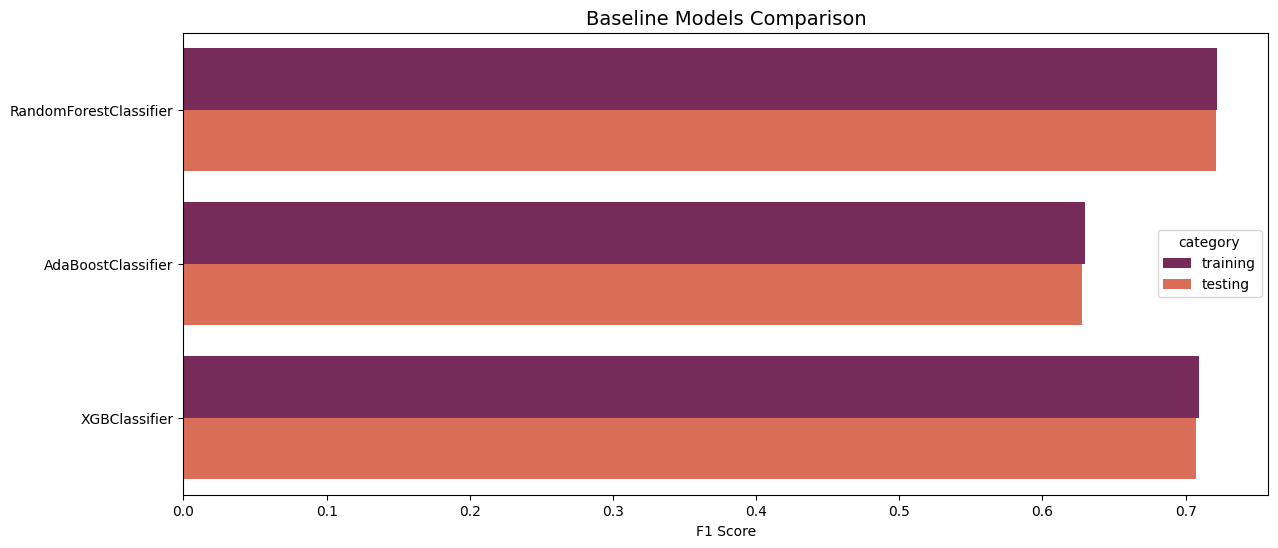

In [184]:
plt.figure(figsize=(14, 6))
sns.barplot(y='model', x='score', data=evaluation, hue='category', palette='rocket')
plt.title('Baseline Models Comparison', size=14)
plt.ylabel('')
plt.xlabel('F1 Score')
plt.show()

Pada grafik di atas, kita dapat melihat perbandingan kinerja tiga model klasifikasi, yaitu RandomForestClassifier, AdaBoostClassifier, dan XGBClassifier, berdasarkan F1 Score pada data training dan testing. Berikut penjelasan untuk masing-masing model:

1. RandomForestClassifier:
* Training: Memiliki F1 score tertinggi dibandingkan dengan model lainnya, mendekati nilai 0.72.
* Testing: F1 score pada testing sedikit lebih rendah dari training, tetapi masih sekitar 0.71.
* Interpretasi: Model Random Forest menunjukkan performa yang sangat baik di antara ketiga model, dengan hasil yang stabil antara data training dan testing. Hal ini menunjukkan bahwa model ini tidak mengalami overfitting atau underfitting.
2. AdaBoostClassifier:
* Training: F1 score dari model ini lebih rendah dibandingkan RandomForest dan XGBoost, yaitu sekitar 0.63.
* Testing: F1 score pada testing bahkan lebih rendah, sekitar 0.62.
* Interpretasi: AdaBoost cukup sensitif terhadap data outlier, yang menyebabkan performanya kurang baik pada dataset ini. Oleh karena itu, model ini kurang direkomendasikan untuk kasus prediksi pembatalan reservasi hotel.
3. XGBClassifier:
* Training: Memiliki performa yang cukup baik dengan F1 score sekitar 0.71.
* Testing: Sama seperti Random Forest, F1 score pada testing sedikit lebih rendah tetapi masih cukup baik di angka sekitar 0.71.
* Interpretasi: XGBoost menunjukkan hasil yang hampir sebanding dengan Random Forest, namun tidak lebih unggul. Meskipun demikian, XGBoost memiliki keunggulan dari segi kecepatan pelatihan dan sering dianggap sebagai salah satu model terbaik untuk data yang kompleks.

**Kesimpulan Umum:**

* RandomForestClassifier memiliki performa terbaik dengan F1 score tertinggi, baik pada data training maupun testing. Model ini mampu menangkap pola yang baik dari dataset dan memberikan hasil yang akurat.
* XGBClassifier juga merupakan pilihan yang bagus dengan performa yang sangat mirip dengan Random Forest.
* AdaBoostClassifier tidak cocok untuk dataset ini karena performanya lebih rendah dibandingkan model lain.

## 5.5 Hyperparameter Tuning Menggunakan Optuna

Setelah mengetahui bahwa model RandomForest memiliki performa tertinggi, langkah selanjutnya adalah melakukan hyperparameter tuning menggunakan pustaka Optuna. Optuna mampu menemukan komposisi parameter terbaik yang dapat digunakan oleh model untuk mencapai performa maksimalnya.

Untuk mempersingkat proses tuning, saya akan menggunakan 5 trials, di mana model akan mencari 5 komposisi parameter dan mencoba mendapatkan nilai terbaik.

In [185]:
def objective(trial, X_train = X_train_prep, y_train = y_train):
    criterions = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 32, log = True)

    clf = RandomForestClassifier(n_estimators=1000,
                                max_depth = max_depth,
                                n_jobs = -1,
                                max_features = 'sqrt',
                                criterion = criterions)

    clf.fit(X_train_prep, y_train)
    preds = clf.predict(X_test_prep)
    return f1_score(y_test, preds)

In [186]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials=5)

[I 2024-09-30 16:45:31,581] A new study created in memory with name: no-name-23fc940d-d5a5-410d-a643-790c22680b9d
[I 2024-09-30 16:45:35,271] Trial 0 finished with value: 0.7220236765691311 and parameters: {'criterion': 'gini', 'max_depth': 25}. Best is trial 0 with value: 0.7220236765691311.
[I 2024-09-30 16:45:37,374] Trial 1 finished with value: 0.49515590653749086 and parameters: {'criterion': 'gini', 'max_depth': 3}. Best is trial 0 with value: 0.7220236765691311.
[I 2024-09-30 16:45:39,777] Trial 2 finished with value: 0.5299836664851831 and parameters: {'criterion': 'entropy', 'max_depth': 5}. Best is trial 0 with value: 0.7220236765691311.
[I 2024-09-30 16:45:42,618] Trial 3 finished with value: 0.6933894230769231 and parameters: {'criterion': 'gini', 'max_depth': 10}. Best is trial 0 with value: 0.7220236765691311.
[I 2024-09-30 16:45:44,977] Trial 4 finished with value: 0.5835600744665617 and parameters: {'criterion': 'gini', 'max_depth': 5}. Best is trial 0 with value: 0.722

In [187]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials=5)

[I 2024-09-30 16:45:44,981] A new study created in memory with name: no-name-580768e7-7ee4-4f5e-b026-41858f033b81
[I 2024-09-30 16:45:47,450] Trial 0 finished with value: 0.6151335916785642 and parameters: {'criterion': 'gini', 'max_depth': 6}. Best is trial 0 with value: 0.6151335916785642.
[I 2024-09-30 16:45:49,970] Trial 1 finished with value: 0.5934873207600481 and parameters: {'criterion': 'entropy', 'max_depth': 6}. Best is trial 0 with value: 0.6151335916785642.
[I 2024-09-30 16:45:52,335] Trial 2 finished with value: 0.5072919184594311 and parameters: {'criterion': 'entropy', 'max_depth': 5}. Best is trial 0 with value: 0.6151335916785642.
[I 2024-09-30 16:45:56,101] Trial 3 finished with value: 0.7213610162851867 and parameters: {'criterion': 'entropy', 'max_depth': 25}. Best is trial 3 with value: 0.7213610162851867.
[I 2024-09-30 16:45:58,653] Trial 4 finished with value: 0.5050080775444264 and parameters: {'criterion': 'entropy', 'max_depth': 5}. Best is trial 3 with value

Penjelasan Kode:
1. optuna.create_study(direction='maximize'): Membuat studi baru dengan Optuna yang bertujuan untuk memaksimalkan nilai yang dikembalikan oleh fungsi objective. Ini biasanya berarti studi ini mencari konfigurasi parameter yang menghasilkan skor metrik evaluasi tertinggi (seperti akurasi, F1 score, dsb).

2. study.optimize(objective, n_trials=5): Memulai proses optimasi dengan fungsi tujuan objective yang telah didefinisikan sebelumnya. Optuna akan melakukan 5 percobaan (n_trials=5), di mana pada setiap percobaan akan mencoba kombinasi parameter yang berbeda untuk menemukan set yang memberikan nilai tertinggi.
Log:

**Pembuatan Studi Baru:**
* "A new study created in memory with name: no-name-6793c6a1-10ec-471c-b627-4b1bac8522e8" menunjukkan bahwa studi baru telah dibuat di memori dengan nama yang dihasilkan secara otomatis oleh Optuna.

**Trial 0 hingga Trial 4:**
* Setiap baris log berikutnya memberikan detail tentang hasil dari setiap trial:
    - "Trial X finished with value: Y and parameters: {'criterion': Z, 'max_depth': A}" menunjukkan bahwa percobaan ke-X telah selesai dengan skor Y menggunakan parameter criterion dengan nilai Z dan max_depth dengan nilai A.
    - "Best is trial X with value: Y" mengindikasikan bahwa trial ini merupakan yang terbaik hingga saat itu dengan skor Y.
* Untuk setiap trial, Optuna mencoba kombinasi criterion (gini atau entropy) dan max_depth (bernilai dari 4 hingga 31 dalam kasus ini) untuk menemukan konfigurasi yang memberikan nilai maksimum yang diinginkan.

Ringkasan:
* Percobaan terbaik adalah trial ke-3, dengan criterion: 'entropy' dan max_depth: 31, menghasilkan nilai maksimum 0.7209666592078765 untuk skor F1 atau metrik yang ditentukan. Optuna secara efektif membandingkan berbagai konfigurasi dan menentukan set parameter yang memberikan kinerja terbaik berdasarkan fungsi tujuan yang diberikan. Ini menunjukkan bagaimana hyperparameter tuning bisa secara signifikan mempengaruhi kinerja model dalam machine learning.

In [188]:
trial = study.best_trial
print('Best f1 score: {}'.format(trial.value))

Best f1 score: 0.7213610162851867


In [189]:
optuna.visualization.plot_optimization_history(study)

Ini adalah grafik yang menunjukkan riwayat optimasi suatu model.

1. Interpretasi Grafik

* Sumbu X (Trial): Merepresentasikan setiap iterasi atau percobaan dalam proses optimasi.
* Sumbu Y (Objective Value): Menunjukkan nilai dari fungsi tujuan (objective function) yang ingin dioptimalkan. Nilai yang lebih tinggi biasanya mengindikasikan hasil yang lebih baik, tergantung pada tujuan optimasi (memaksimalkan atau meminimalkan).
* Titik Biru (Objective Value): Menunjukkan nilai fungsi tujuan pada setiap percobaan.
* Garis Merah (Best Value): Menunjukkan nilai fungsi tujuan terbaik yang dicapai hingga percobaan tersebut.

2. Kesimpulan

* Dari grafik tersebut, bisa dilihat bahwa:

    - Model mengalami peningkatan performa (nilai fungsi tujuan meningkat) dari percobaan pertama hingga percobaan kedua.
    - Setelah percobaan kedua, performa model cenderung stagnan, mengindikasikan proses optimasi mungkin sudah mendekati titik optimal.
    - Terdapat dua percobaan (sekitar percobaan ke-3 dan ke-4) yang menghasilkan nilai fungsi tujuan yang lebih buruk dari percobaan sebelumnya. Hal ini bisa terjadi karena proses optimasi yang bersifat eksploratif, mencoba kombinasi parameter yang berbeda.

**Informasi Tambahan:**

Tanpa informasi lebih lanjut mengenai model dan tujuan optimasi, sulit untuk memberikan interpretasi yang lebih spesifik

In [190]:
optuna.visualization.plot_parallel_coordinate(study)

**Deskripsi Grafik**

Grafik ini menunjukkan riwayat optimasi suatu model.

* Poin Penting:

    - Peningkatan Awal yang Cepat: Performa model (diukur oleh "Nilai Tujuan") mengalami peningkatan yang signifikan dari percobaan 0 ke percobaan 1.
    - Performa yang Stagnan: Setelah percobaan 1, nilai tujuan terbaik tetap relatif datar, menunjukkan bahwa percobaan optimasi selanjutnya tidak menghasilkan perbaikan yang substansial.
    - Potensi Overfitting: Percobaan 3 dan 4 menunjukkan penurunan nilai tujuan, yang bisa menunjukkan overfitting pada data pelatihan. Ini berarti model mungkin terlalu baik dalam mempelajari data pelatihan dan gagal dalam menggeneralisasi data yang tidak terlihat.

In [191]:
optuna.visualization.plot_param_importances(study)

### 5.6 Membuat Model dengan Parameter Terbaik

Meskipun peningkatan hasil setelah tuning tidak signifikan (hanya naik 0.01), kita tetap dapat membuat model menggunakan parameter terbaik yang telah ditemukan. Hal ini untuk memastikan bahwa kita menggunakan konfigurasi optimal untuk model prediksi. Setelah tuning, model ini akan dilatih ulang menggunakan parameter terbaik tersebut untuk mengoptimalkan kinerja dan prediksi pembatalan reservasi hotel. Model yang dihasilkan akan memberikan hasil terbaik berdasarkan data yang ada setelah tuning selesai dilakukan.

In [192]:
best_trial = study.best_trial.params
best_trial

{'criterion': 'entropy', 'max_depth': 25}

In [193]:
rfc_tuned = RandomForestClassifier(criterion='entropy',
                                    n_estimators=1000,
                                    max_depth=27,
                                    n_jobs = -1,
                                    max_features='sqrt',
                                    random_state=89)

rfc_tuned.fit(X_train_prep, y_train)
preds = rfc_tuned.predict(X_test_prep)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     15839
           1       0.75      0.70      0.72      9233

    accuracy                           0.80     25072
   macro avg       0.79      0.78      0.78     25072
weighted avg       0.80      0.80      0.80     25072

[[13636  2203]
 [ 2772  6461]]


### 5.7 Penyesuaian Threshold

Karena nilai recall masih sedikit lebih rendah daripada precision, kita akan mengubah nilai ambang standar dari 0.5 menjadi 0.3. Dengan penyesuaian threshold ini, nilai F1 meningkat sekitar 0.01 dari skor sebelumnya. Selain itu, nilai recall mengalami peningkatan yang signifikan, dari 70% menjadi 85%. Perubahan ini berarti bahwa model lebih baik dalam mengidentifikasi pembatalan, sehingga mengurangi risiko False Negatives yang dapat merugikan hotel, khususnya dalam situasi di mana prediksi pembatalan sangat penting.

In [194]:
print('Classif Report:\n',classification_report(y_test, rfc_tuned.predict_proba(X_test_prep)[:,1] >= 0.3)) 
print('Confusion Matrix:\n',confusion_matrix(y_test, rfc_tuned.predict_proba(X_test_prep)[:,1] >= 0.3))

Classif Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80     15839
           1       0.64      0.85      0.73      9233

    accuracy                           0.77     25072
   macro avg       0.77      0.79      0.76     25072
weighted avg       0.80      0.77      0.77     25072

Confusion Matrix:
 [[11369  4470]
 [ 1357  7876]]


### 5.8 Skor ROC AUC

* Sensitivitas / Tingkat Positif Benar / Recall menginformasikan proporsi kelas positif yang diklasifikasikan dengan benar.

    - Rumus: TP / (TP + FN)
    - Contoh: proporsi tamu yang benar-benar membatalkan yang terdeteksi dengan benar oleh model.

* Tingkat Negatif Salah menunjukkan proporsi kelas positif yang diklasifikasikan salah oleh classifier. Tingkat Positif Benar yang tinggi dan Tingkat Negatif Salah yang rendah diinginkan untuk mengklasifikasikan kelas positif dengan benar.

    - Rumus: FN / (TP + FN)

* Spesifisitas / Tingkat Negatif Benar menginformasikan proporsi kelas negatif yang diklasifikasikan dengan benar.

    - Rumus: TN / (TN + FP)

    - Contoh: proporsi orang yang tidak akan membatalkan yang diidentifikasi dengan benar oleh model.

* Tingkat Positif Salah memberitahu proporsi kelas negatif yang diklasifikasikan salah oleh classifier. Tingkat Negatif Benar yang tinggi dan Tingkat Positif Salah yang rendah diinginkan untuk mengklasifikasikan kelas negatif dengan benar.

    - Rumus: FP / (TN + FP) = 1 - Spesifisitas

**Kurva Karakteristik Operator Penerima (ROC)** merupakan metrik evaluasi untuk masalah klasifikasi biner. Ini adalah kurva probabilitas yang memplot Tingkat Positif Benar terhadap Tingkat Positif Salah pada berbagai nilai ambang dan pada dasarnya memisahkan 'sinyal' dari 'kebisingan'. Area di Bawah Kurva (AUC) adalah ukuran kemampuan classifier untuk membedakan antar kelas dan digunakan sebagai ringkasan dari kurva ROC.

**Semakin tinggi AUC**, semakin baik performa model dalam membedakan antara kelas positif dan negatif. Model kita menghasilkan skor AUC 0.79 yang dikategorikan sebagai cukup baik dalam membedakan kelas positif dan negatif.

<function matplotlib.pyplot.show(close=None, block=None)>

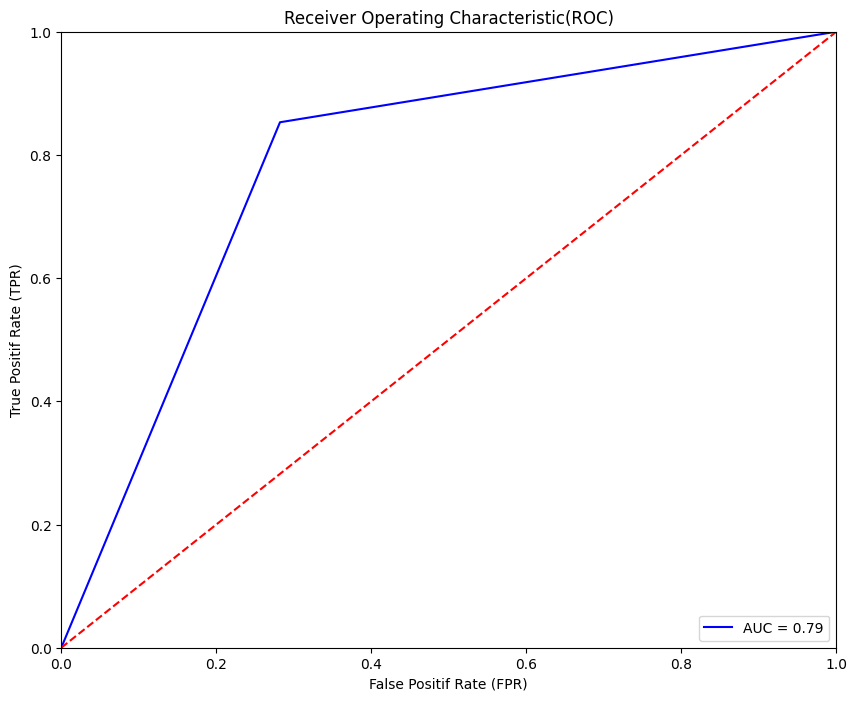

In [195]:
probs = rfc_tuned.predict_proba(X_test_prep)
preds = probs[:,1] >= 0.3
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positif Rate (TPR)')
plt.xlabel('False Positif Rate (FPR)')
plt.show

Grafik di Atas menunjukkan kurva Receiver Operating Characteristic (ROC) untuk model klasifikasi ini. ROC mengukur kinerja model dengan membandingkan True Positive Rate (TPR) dengan False Positive Rate (FPR) pada berbagai threshold klasifikasi.

Nilai Area Under the Curve (AUC) sebesar 0.79 menunjukkan bahwa model ini memiliki kemampuan yang cukup baik dalam membedakan antara kelas positif dan negatif. Secara umum, AUC mendekati 1 menunjukkan kinerja model yang lebih baik. Pada kasus ini, model Anda memiliki tingkat kinerja yang baik dalam prediksi.

### 5.9 Feature Importance

Dalam membangun model machine learning yang terawasi, penting untuk memahami fitur mana yang paling berpengaruh terhadap hasil yang kita minati. Fitur yang sangat berkaitan dengan hasil dianggap lebih penting dan dapat digunakan untuk inspeksi model serta komunikasi. Para pemangku kepentingan mungkin tertarik untuk mengetahui fitur mana yang paling penting untuk prediksi.

Berdasarkan hasil feature importance yang dihasilkan oleh model, fitur-fitur yang paling mempengaruhi hasil prediksi adalah:

1. Tipe deposit (Non-refund)
2. Total permintaan khusus
3. Segmen pasar (Offline TA/TO)
4. Ruang parkir yang dibutuhkan
5. Negara (Prancis & Inggris Raya)
6. Perubahan pemesanan

Fitur-fitur ini bisa digunakan sebagai metode penyaringan untuk menghilangkan fitur yang tidak relevan dari model kita dan hanya mempertahankan yang paling berkaitan dengan hasil yang kita minati.

In [196]:
xgb_fi = pd.DataFrame(rfc_tuned.feature_importances_.T, index = X_test_prep.columns, columns = ["Feature Importance"])

In [197]:
xgb_fi.sort_values("Feature Importance", ascending = False)

,Feature Importance
onehot__deposit_type_Non Refund,0.255953
num__total_of_special_requests,0.106980
binary__2_2,0.094671
num__required_car_parking_spaces,0.072342
binary__0_6,0.066449
binary__0_5,0.059761
num__booking_changes,0.056908
binary__2_0,0.049308
onehot__customer_type_Transient,0.036845
binary__0_7,0.031156


## 6. KESIMPULAN DAN REKOMENDASI

### 6.1 Kesimpulan

Berdasarkan kinerja model pembelajaran mesin yang telah dilatih, ditemukan bahwa kinerja model Random Forest cukup baik, menghasilkan skor F1 sebesar 0,73 dan recall sebesar 0,85. Kita dapat menyimpulkan bahwa jika model kita digunakan untuk menyaring daftar tamu yang telah membuat reservasi, maka model kita dapat memprediksi bahwa 85% dari tamu tersebut kemungkinan akan membatalkan nantinya. Selain itu, model kita juga dapat memprediksi sekitar 72% pada tamu yang akan datang ke hotel (semua ini berdasarkan analisis recall).

Skor presisi 1 menunjukkan bahwa model kita memiliki akurasi sebesar 64% dari tamu yang benar-benar membatalkan pemesanan. Ini berarti bahwa ketika model kita memprediksi 85 tamu yang akan membatalkan pemesanan, probabilitas kebenaran adalah 64%. Ini mengimplikasikan bahwa masih akan ada tamu yang sebenarnya tidak akan membatalkan tetapi diprediksi akan membatalkan oleh 21% (Pengurangan Recall dan Presisi Kelas 1).

Mari kita gunakan contoh untuk mendemonstrasikan ini secara praktis. Jika biaya untuk satu kamar standar per malam adalah USD 10, dan anggap jumlah tamu yang membuat reservasi dalam periode tertentu adalah 200 orang (yaitu 100 orang mungkin akan membatalkan nantinya, dan 100 orang mungkin akan datang nantinya), maka perhitungan akan seperti ini:

**Tanpa model (semua tamu yang membuat reservasi):** 

Total pendapatan yang diperkirakan => 200 x $10 = $2,000 Total tamu yang datang => 100 orang Total tamu yang membatalkan last minute => 100 orang (kita tidak mengantisipasi skenario ini) Kamar yang tidak terpakai = 100 kamar Kerugian pendapatan => 100 kamar x $10 = $1,000

Dengan menggunakan model, kita dapat memprediksi bahwa 85% dari tamu yang membuat reservasi kemungkinan akan membatalkan nantinya, yang berarti 170 tamu dari 200.
Namun, karena presisi model adalah 0.64, kita dapat berharap bahwa 109 dari 170 prediksi pembatalan sebenarnya benar.
Ini berarti bahwa 61 tamu yang diprediksi akan membatalkan akan sebenarnya datang, dan kita perlu menampung mereka juga.
Dengan menggunakan model, kita dapat menghemat 1090 USD, yang merupakan selisih antara biaya total untuk menampung semua 200 tamu (2000 USD) dan biaya total untuk menampung 91 tamu yang kita perlu siapkan (910 USD).

Dari analisis yang dilakukan menggunakan model Random Forest, diketahui bahwa model ini memiliki performa yang sangat baik dengan skor F1 sebesar 0.73 dan recall sebesar 0.85. Ini menunjukkan bahwa model mampu memprediksi pembatalan reservasi dengan tingkat akurasi yang tinggi. Misalnya, jika biaya per malam satu kamar standar adalah USD 10 dan ada 200 tamu yang membuat reservasi, model dapat membantu mengurangi risiko kehilangan pendapatan dan mengantisipasi risiko overbooking dengan lebih efektif.

Dengan menggunakan model ini, manajer pemesanan dapat lebih akurat dalam memfilter tamu yang kemungkinan akan membatalkan pemesanan, sehingga dapat mengambil langkah preventif seperti memberikan penawaran khusus atau mengirimkan konfirmasi ulang kepada tamu yang prediksi model menunjukkan mereka mungkin membatalkan. Ini akan mengurangi kehilangan pendapatan yang disebabkan oleh pembatalan pemesanan dan membantu manajemen hotel mengelola kamar dengan lebih efisien.

**Dengan model (semua tamu yang membuat reservasi dengan prediksi):**

Dengan model (semua tamu yang membuat reservasi dengan prediksi):

- Total pendapatan yang diperkirakan => 200 x $10 = $2,000 Total pendapatan aktual (tamu yang diprediksi akan datang) => 72 kamar x $10 = $720
- Tamu yang diprediksi akan membatalkan => 85 orang (recall 1/tidak dibatalkan adalah 85%) Tamu yang benar-benar membatalkan sesuai prediksi => 64 orang (presisi 1/tidak dibatalkan adalah 64%) Kamar yang diprediksi tidak terpakai = 85 kamar (tamu yang akan membatalkan) namun kita dapat segera mengiklankannya di situs web/agen perjalanan online dengan penawaran yang lebih baik, misalnya diskon 13% per malam (https://www.nerdwallet.com/article/travel/is-it-cheaper-to-book-hotel-last-minute) Pendapatan setelah prediksi = $720 + (85 x USD 10 - diskon 13%) = USD 1,485
- Prediksi palsu pembatalan = 85 kamar - 64 kamar = 21 kamar Overbooking = 21 kamar (tamu yang tidak membatalkan tetapi diprediksi salah bahwa kita masih mengiklankan kamar tersebut sebagai kamar yang tersedia di situs web/agen perjalanan dapat menyebabkan overbooking)

* Solusi: 
    - kita dapat mengirim email konfirmasi kepada tamu-tamu tersebut beberapa hari sebelum check-in untuk memperbarui konfirmasi pemesanan sebelum mengiklankan kamar.
    - Jika mereka semua mengkonfirmasi akan datang, maka total pendapatan akhir akan menjadi: $1,485 + (21 kamar overbooking x $10) = $1,695
        - Kerugian pendapatan yang diperkirakan => $2,000 - $1,695 = $305

* Kesimpulan, dengan menggunakan model ini, dapat membantu manajer pemesanan untuk mengurangi risiko kerugian pendapatan yang disebabkan oleh pembatalan pemesanan dan untuk mengantisipasi risiko yang terkait dengan overbooking kamar.


Dengan penerapan model prediksi pembatalan pemesanan hotel, proyeksi pendapatan lebih akurat dapat dihasilkan. Dari total pendapatan yang diperkirakan sebesar $2,000 (200 tamu dengan tarif $10 per malam), model memprediksi bahwa 85 tamu akan membatalkan pemesanan, sehingga pendapatan aktual diperkirakan menjadi $720 dari 72 kamar yang terpakai.

Pendapatan ini dapat ditingkatkan dengan mengiklankan kembali 85 kamar yang diprediksi kosong menggunakan diskon 13%, menghasilkan pendapatan sebesar $1,485. Namun, terdapat risiko 21 kamar yang diprediksi dibatalkan ternyata tidak, yang dapat menyebabkan overbooking.

Untuk mengantisipasi overbooking, hotel dapat mengirimkan email konfirmasi beberapa hari sebelum check-in kepada tamu untuk memperbarui pemesanan. Jika semua tamu yang diprediksi akan membatalkan mengkonfirmasi kehadiran, pendapatan bisa meningkat menjadi $1,695. Dengan strategi ini, kerugian pendapatan berkurang dari $1,000 menjadi $305, memperlihatkan manfaat model prediksi dalam mengurangi kerugian dan risiko operasional.

Solusi: Email konfirmasi kepada tamu sebelum mengiklankan kamar dapat membantu mengurangi risiko overbooking. Kesimpulannya, model ini secara efektif mengurangi kerugian akibat pembatalan dan memungkinkan optimalisasi kamar melalui prediksi yang lebih akurat.

CLASSIFICATION REPORT - RF TUNED:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80     15839
           1       0.64      0.85      0.73      9233

    accuracy                           0.77     25072
   macro avg       0.77      0.79      0.76     25072
weighted avg       0.80      0.77      0.77     25072

CONFUSION MATRIX - RF TUNED


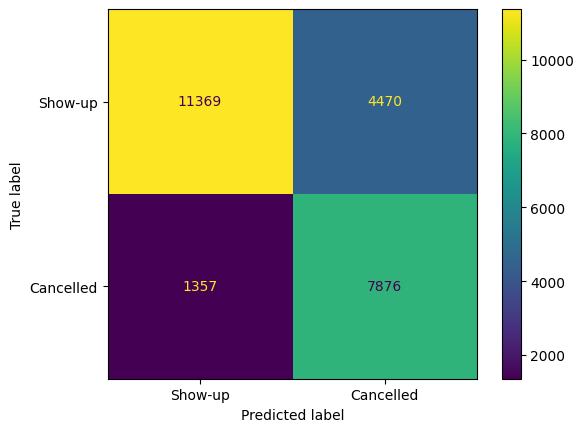

In [198]:
y_test_pred = rfc_tuned.predict_proba(X_test_prep)[:,1] >= 0.3
confusion_matrix_catboost = confusion_matrix(y_test, y_test_pred)


print('CLASSIFICATION REPORT - RF TUNED:\n', classification_report(y_test, y_test_pred) )

print("CONFUSION MATRIX - RF TUNED")
ConfusionMatrixDisplay(confusion_matrix_catboost, display_labels=np.array(['Show-up', 'Cancelled'])).plot();

### 6.2 Rekomendasi


Untuk meningkatkan kinerja model dan meningkatkan akurasi prediksi F1, beberapa rekomendasi berikut dapat dilakukan:

1. Menambahkan Fitur Baru
    
    Menambahkan fitur baru atau field yang terkait dengan informasi tamu, seperti:

    - Waktu lead time
    - Riwayat waktu reservasi
    - Detail keluhan
    - Dan lain-lain
    - Menguji Algoritma ML Lain

2. Menguji Algoritma ML Lain

    Menguji algoritma ML lain yang dapat memberikan prediksi yang lebih baik atau mengubah tuning hyperparameter pada model yang ada secara teratur. Terutama jika ada liburan musim seperti liburan musim panas, Natal, dan Tahun Baru.

4. Menggunakan Teknik Ensemble

    Menggunakan teknik ensemble untuk menggabungkan hasil prediksi dari beberapa model yang berbeda. Dengan demikian, kita dapat meningkatkan akurasi prediksi dan mengurangi risiko kesalahan.

5. Menganalisis Data yang Salah

    Menggunakan data yang lebih baik dan lebih lengkap untuk melatih model. Dengan demikian, kita dapat meningkatkan kinerja model dan membuat prediksi yang lebih akurat.

Dengan melakukan rekomendasi di atas, kita dapat meningkatkan kinerja model dan membuat prediksi yang lebih akurat.